## Context:
I've conducted an Exploratory Data Analysis (EDA) on J Cole's Spotify track data. The dataset includes a diverse set of attributes and audio features for each of his songs, such as acousticness, danceability, duration, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time signature, and valence. These features shed light on the musical elements within J Cole's tracks. 

## Objective:
The main aim of this EDA is to dive deep into J Cole's music using the Spotify data at our disposal. By scrutinizing these track attributes and audio features, our goal is to unearth underlying patterns, identify trends, and explore connections between these attributes. Through this analysis, we hope to gain a richer understanding of the distinctive musical qualities and emotional vibe present in J Cole's songs, offering a more profound insight into his artistic style and musical essence.

## Data Dictionary

* acousticness number - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.


* danceability- Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable


* duration_ms - The duration of the track in milliseconds.


* energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.


* instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


* key - The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.


* liveness number - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


* loudness number - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.


* mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.


* speechiness number - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.


* tempo number - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


* time_signature - An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".


* valence number - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


* The 'popularity' attribute is a numerical value that indicates the relative popularity of a track compared to other tracks on Spotify. It is a measure of how frequently a track is listened to and engaged with by Spotify users. The popularity score ranges from 0 to 100, with 100 being the highest level of popularity.

In [155]:
%reload_ext nb_black

import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.colors import ListedColormap
from sklearn import metrics

sns.set_theme(style="darkgrid")


pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", None)


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from scipy.spatial.distance import cdist, pdist


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Reading the Dataset

In [156]:
data = pd.read_csv("J4.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Overview of the Dataset

In [157]:
rows, columns = data.shape
print(f"There are {rows} rows and {columns} columns.")

There are 160 rows and 17 columns.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Displaying few rows of the dataset

In [158]:
data.sample(n=10, random_state=1)

,name,album_name,release_date,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
29,LamboTruck (with Cozz feat. REASON & Childish ...,Revenge Of The Dreamers III: Director's Cut,2020-01-16,0.05140,0.659,229387,0.693,0.000000,10,0.184,-5.268,0,0.2980,135.001,4,0.2610,40
42,MIDDLE CHILD,Revenge Of The Dreamers III: Director's Cut,2020-01-16,0.19100,0.839,213000,0.484,0.000000,8,0.254,-6.900,1,0.2420,126.021,4,0.5130,43
14,Heaven’s EP (with J. Cole),D-Day: A Gangsta Grillz Mixtape,2022-03-31,0.29600,0.686,178292,0.667,0.000000,2,0.218,-7.284,1,0.4260,77.977,4,0.6670,67
91,She's Mine Pt. 1,4 Your Eyez Only,2016-12-09,0.76600,0.439,209080,0.204,0.091300,2,0.284,-15.165,1,0.0587,139.652,4,0.0408,69
81,Kevin’s Heart,KOD,2018-04-20,0.48200,0.829,200310,0.527,0.000000,6,0.631,-6.644,0,0.3670,116.079,4,0.4750,77
19,p u n c h i n ‘ . t h e . c l o c k,The Off-Season,2021-05-14,0.19700,0.769,112579,0.740,0.000000,11,0.171,-6.579,0,0.3780,94.104,4,0.6920,65
44,Sacrifices (with EARTHGANG & J. Cole feat. Smi...,Revenge Of The Dreamers III: Director's Cut,2020-01-16,0.10100,0.827,382307,0.685,0.000000,0,0.109,-6.978,1,0.4070,146.995,4,0.2750,46
11,Everybody Ain’t Shit (with EARTHGANG),D-Day: A Gangsta Grillz Mixtape,2022-03-31,0.00618,0.686,203419,0.598,0.000000,1,0.140,-6.983,1,0.3910,199.864,4,0.3180,46
40,Sunset (with J. Cole feat. Young Nudy),Revenge Of The Dreamers III: Director's Cut,2020-01-16,0.15300,0.923,178373,0.382,0.000000,1,0.151,-7.117,1,0.1990,129.927,4,0.4060,42
97,Intro - Live,"Forest Hills Drive: Live from Fayetteville, NC",2016-01-28,0.06440,0.266,126080,0.470,0.000138,2,0.820,-11.847,0,0.0457,86.084,3,0.0863,35


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [159]:
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 160


,name,album_name,release_date,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,Stick (with JID & J. Cole feat. Kenny Mason & ...,D-Day: A Gangsta Grillz Mixtape,2022-03-31,0.266,0.671,309323,0.857,0.000000,7,0.668,-5.435,1,0.2920,118.574,4,0.597,69
1,Ghetto Gods Freestyle (with EARTHGANG feat. 2 ...,D-Day: A Gangsta Grillz Mixtape,2022-03-31,0.495,0.842,173589,0.403,0.000000,10,0.359,-8.087,1,0.5830,122.754,4,0.584,51
2,Lifestyle (with Bas feat. A$AP Ferg),D-Day: A Gangsta Grillz Mixtape,2022-03-31,0.120,0.832,166776,0.700,0.000000,0,0.239,-6.005,0,0.0491,145.937,4,0.586,56
3,"Starting 5 (with Lute, Cozz & Omen)",D-Day: A Gangsta Grillz Mixtape,2022-03-31,0.253,0.504,270045,0.636,0.000000,1,0.211,-12.926,1,0.3990,82.776,4,0.713,49
4,Coming Down (with Ari Lennox),D-Day: A Gangsta Grillz Mixtape,2022-03-31,0.115,0.813,156944,0.600,0.000013,9,0.159,-6.769,0,0.0602,125.981,4,0.622,50


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [160]:
print("Number of datapoints:", len(data))
data.tail()

Number of datapoints: 160


,name,album_name,release_date,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
155,Never Told,Cole World: The Sideline Story,2011-09-27,0.3960,0.326,211520,0.650,0.000000,11,0.119,-9.574,0,0.199,84.461,3,0.438,48
156,Rise and Shine,Cole World: The Sideline Story,2011-09-27,0.0551,0.425,274960,0.768,0.000000,9,0.190,-5.969,1,0.272,81.337,4,0.274,57
157,God's Gift,Cole World: The Sideline Story,2011-09-27,0.0311,0.332,212800,0.791,0.000264,1,0.104,-4.489,0,0.220,79.650,4,0.439,51
158,Breakdown,Cole World: The Sideline Story,2011-09-27,0.0207,0.455,285307,0.647,0.055600,1,0.098,-7.270,1,0.203,99.505,3,0.489,50
159,Work Out,Cole World: The Sideline Story,2011-09-27,0.0531,0.831,235320,0.427,0.000000,2,0.307,-6.903,1,0.106,93.004,4,0.216,85


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              160 non-null    object 
 1   album_name        160 non-null    object 
 2   release_date      160 non-null    object 
 3   acousticness      160 non-null    float64
 4   danceability      160 non-null    float64
 5   duration_ms       160 non-null    int64  
 6   energy            160 non-null    float64
 7   instrumentalness  160 non-null    float64
 8   key               160 non-null    int64  
 9   liveness          160 non-null    float64
 10  loudness          160 non-null    float64
 11  mode              160 non-null    int64  
 12  speechiness       160 non-null    float64
 13  tempo             160 non-null    float64
 14  time_signature    160 non-null    int64  
 15  valence           160 non-null    float64
 16  popularity        160 non-null    int64  
dt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [162]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,160,140,Intro,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
album_name,160,10,Revenge Of The Dreamers III: Director's Cut,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,160,10,2020-01-16,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,160.0,NaN,NaN,NaN,0.280905,0.236679,0.00137,0.085525,0.193,0.452,0.936
danceability,160.0,NaN,NaN,NaN,0.658163,0.137187,0.266,0.55575,0.6745,0.76825,0.924
duration_ms,160.0,NaN,NaN,NaN,229441.8,90113.448508,36667.0,178053.25,217867.0,270487.0,875307.0
energy,160.0,NaN,NaN,NaN,0.61825,0.153602,0.194,0.526,0.6405,0.725,0.912
instrumentalness,160.0,NaN,NaN,NaN,0.002092,0.011326,0.0,0.0,0.0,0.000003,0.0913
key,160.0,NaN,NaN,NaN,5.09375,3.794728,0.0,1.0,5.0,8.0,11.0
liveness,160.0,NaN,NaN,NaN,0.254476,0.212496,0.0517,0.10975,0.171,0.3125,0.953


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [163]:
data.isna().sum()

name                0
album_name          0
release_date        0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [164]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [165]:
data.nunique()

name                140
album_name           10
release_date         10
acousticness        145
danceability        142
duration_ms         141
energy              131
instrumentalness     51
key                  12
liveness            135
loudness            157
mode                  2
speechiness         140
tempo               159
time_signature        4
valence             144
popularity           48
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Cleaning

In [166]:
data["release_date"] = pd.to_datetime(data["release_date"])
dates = []
for i in data["release_date"]:
    i = i.date()
    dates.append(i)
# Dates of the newest and oldest recorded customer
print("The newest album release date:", max(dates))
print("The oldest album release date:", min(dates))

The newest album release date: 2022-03-31
The oldest album release date: 2011-09-27


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [167]:
print("Total categories in the feature name:\n", data["name"].value_counts(), "\n")
print(
    "Total categories in the feature album name:\n", data["album_name"].value_counts()
)

Total categories in the feature name:
 name
Intro                                                                                                                   3
Rembrandt...Run It Back (with JID & J. Cole feat. Vince Staples)                                                        2
Self Love (with Ari Lennox & Bas feat. Baby Rose)                                                                       2
Under The Sun (with J. Cole & Lute feat. DaBaby)                                                                        2
Down Bad (feat. JID, Bas, J. Cole, EARTHGANG & Young Nudy)                                                              2
LamboTruck (with Cozz feat. REASON & Childish Major)                                                                    2
Swivel (with EARTHGANG) - From The Album "Mirrorland"                                                                   2
Oh Wow...Swerve (with J. Cole feat. Zoink Gang, KEY! & Maxo Kream)                                    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [168]:
data.album_name.unique()

array(['D-Day: A Gangsta Grillz Mixtape', 'The Off-Season',
       "Revenge Of The Dreamers III: Director's Cut",
       'Revenge Of The Dreamers III', 'KOD', '4 Your Eyez Only',
       'Forest Hills Drive: Live from Fayetteville, NC',
       '2014 Forest Hills Drive', 'Born Sinner (Deluxe Version)',
       'Cole World: The Sideline Story'], dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The album column seems to include mixtapes, and live perfomances.

In [169]:
albums_to_remove = ["Revenge Of The Dreamers III: Director's Cut",
                    'Revenge Of The Dreamers III',
                    'D-Day: A Gangsta Grillz Mixtape',
                    'Forest Hills Drive: Live from Fayetteville, NC']

data = data[~data['album_name'].isin(albums_to_remove)]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Removed all mixtapes and live album performances. 

In [170]:
data.album_name.unique()

array(['The Off-Season', 'KOD', '4 Your Eyez Only',
       '2014 Forest Hills Drive', 'Born Sinner (Deluxe Version)',
       'Cole World: The Sideline Story'], dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Now all we have are studio albums that will be used to complete are analysis further. 

In [171]:
# Extract album information from the "album_name" column
data["album"] = data["album_name"].str.replace(r"\(.*\)", "", regex=True)
data["album"] = data["album"].str.replace("[^\w\s]", "", regex=True)
data["album"] = data["album"].str.lower()
data["album"] = data["album"].str.strip()

# Rearrange the columns with "album" at the beginning
column_order = ["album"] + [col for col in data.columns if col != "album"]
data = data[column_order]

# Drop the "album_name" column
data = data.drop("album_name", axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [172]:
# Extract song information from the "name" column
data["song"] = data["name"].str.replace(r"\(.*\)", "", regex=True)
data["song"] = data["song"].str.replace("[^\w\s]", "", regex=True)
data["song"] = data["song"].str.lower()
data["song"] = data["song"].str.strip()

# Rearrange the columns with "song" at the beginning
column_order = ["song"] + [col for col in data.columns if col != "song"]
data = data[column_order]

# Drop the original "name" column
data = data.drop("name", axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [173]:
data.album.unique()

array(['the offseason', 'kod', '4 your eyez only',
       '2014 forest hills drive', 'born sinner',
       'cole world the sideline story'], dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [174]:
data.head()

,song,album,release_date,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
15,9 5 s o u t h,the offseason,2021-05-14,0.2710,0.713,196946,0.793,0.0,2,0.727,-5.277,1,0.397,71.724,4,0.2030,67
16,a m a r i,the offseason,2021-05-14,0.1270,0.725,148421,0.713,0.0,4,0.617,-6.173,0,0.187,65.988,4,0.2070,77
17,m y l i f e,the offseason,2021-05-14,0.0622,0.597,218802,0.587,0.0,7,0.214,-7.026,0,0.137,140.021,4,0.0753,82
18,a p p l y i n g p r e s s u r e,the offseason,2021-05-14,0.0814,0.699,177337,0.759,0.0,1,0.312,-5.302,1,0.311,83.092,4,0.4040,63
19,p u n c h i n t h e c l o c k,the offseason,2021-05-14,0.1970,0.769,112579,0.740,0.0,11,0.171,-6.579,0,0.378,94.104,4,0.6920,65


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [175]:
data.tail()

,song,album,release_date,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
155,never told,cole world the sideline story,2011-09-27,0.3960,0.326,211520,0.650,0.000000,11,0.119,-9.574,0,0.199,84.461,3,0.438,48
156,rise and shine,cole world the sideline story,2011-09-27,0.0551,0.425,274960,0.768,0.000000,9,0.190,-5.969,1,0.272,81.337,4,0.274,57
157,gods gift,cole world the sideline story,2011-09-27,0.0311,0.332,212800,0.791,0.000264,1,0.104,-4.489,0,0.220,79.650,4,0.439,51
158,breakdown,cole world the sideline story,2011-09-27,0.0207,0.455,285307,0.647,0.055600,1,0.098,-7.270,1,0.203,99.505,3,0.489,50
159,work out,cole world the sideline story,2011-09-27,0.0531,0.831,235320,0.427,0.000000,2,0.307,-6.903,1,0.106,93.004,4,0.216,85


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The dataset contains 84 entries after cleaning up non-studio albums. 

* The dataset contains 4 different data types. The dtypes are  1 datetime64, 9 float 64's, 5 int64 and 2 objects.

In [176]:
average_popularity = data["popularity"].mean()
print("Average popularity:", average_popularity)

Average popularity: 64.21428571428571


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Above Average Popularity: With an average popularity score of 64.21, the majority of the artist's tracks are likely to be above the midpoint of 50. This suggests that their music is generally well-liked and frequently listened to by Spotify users.

* Consistency: The artist maintains a relatively consistent level of popularity across their tracks. While individual tracks may vary in popularity, the average score indicates that their catalog as a whole is appealing to a substantial audience.

* Broad Appeal: The artist's music likely has a broad appeal and can attract a diverse audience. The popularity score reflects the artist's ability to resonate with a wide range of listeners.

* Likely Recognition: An average popularity of 64.21 suggests that the artist is likely to be recognized and appreciated by a substantial number of Spotify users. Their music may have a considerable following and a presence in various playlists.

* Room for Growth: While 64.21 is a good average score, there is still room for the artist to increase their popularity and potentially reach an even wider audience.

In [177]:
max_popularity = data["popularity"].max()
max_popularity_track = data[data["popularity"] == max_popularity][
    ["song", "album", "popularity"]
]
print("Max popularity track:")
print(max_popularity_track)

Max popularity track:
               song                    album  popularity
118  no role modelz  2014 forest hills drive          92


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Fan Favorite: "No Role Modelz" is a clear fan favorite, as indicated by its exceptional popularity score of 92. This suggests that it has garnered significant attention and appreciation among Spotify users.

* Playlist Inclusion: The track may have benefited from being featured in popular playlists or having a strong presence in user-generated playlists, contributing to its high popularity.

In [178]:
data.isna().sum()

song                0
album               0
release_date        0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* There are no missing values in our data

### Creating a copy of original data

In [179]:
df = data.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [180]:
df.drop(
    columns=[
        "duration_ms",
        "key",
        "mode",
        "liveness",
        "loudness",
        "time_signature",
        "release_date",
    ],
    inplace=True,
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 15 to 159
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song              84 non-null     object 
 1   album             84 non-null     object 
 2   acousticness      84 non-null     float64
 3   danceability      84 non-null     float64
 4   energy            84 non-null     float64
 5   instrumentalness  84 non-null     float64
 6   speechiness       84 non-null     float64
 7   tempo             84 non-null     float64
 8   valence           84 non-null     float64
 9   popularity        84 non-null     int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 7.2+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Statistical summary of the dataset

In [182]:
df.describe()

,acousticness,danceability,energy,instrumentalness,speechiness,tempo,valence,popularity
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.315673,0.641286,0.597702,0.003805,0.261739,108.567119,0.388290,64.214286
std,0.270324,0.139042,0.167046,0.015446,0.146557,32.897310,0.208009,9.963876
min,0.001370,0.326000,0.194000,0.000000,0.036600,62.818000,0.040800,44.000000
25%,0.082300,0.537000,0.495250,0.000000,0.139250,83.060750,0.224250,57.000000
50%,0.238000,0.656500,0.625500,0.000000,0.264500,96.029000,0.347000,65.000000
75%,0.508500,0.741000,0.726750,0.000139,0.364750,132.524250,0.503000,70.000000
max,0.936000,0.898000,0.912000,0.091300,0.751000,188.013000,0.966000,92.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [183]:
df.isna().sum()

song                0
album               0
acousticness        0
danceability        0
energy              0
instrumentalness    0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

* Invesitaging and understanding the data better before building a model with it. 

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    df: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created, and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

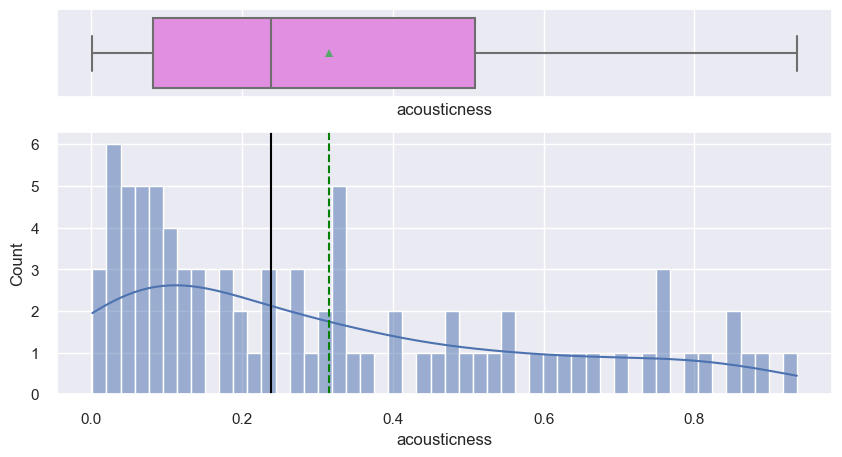

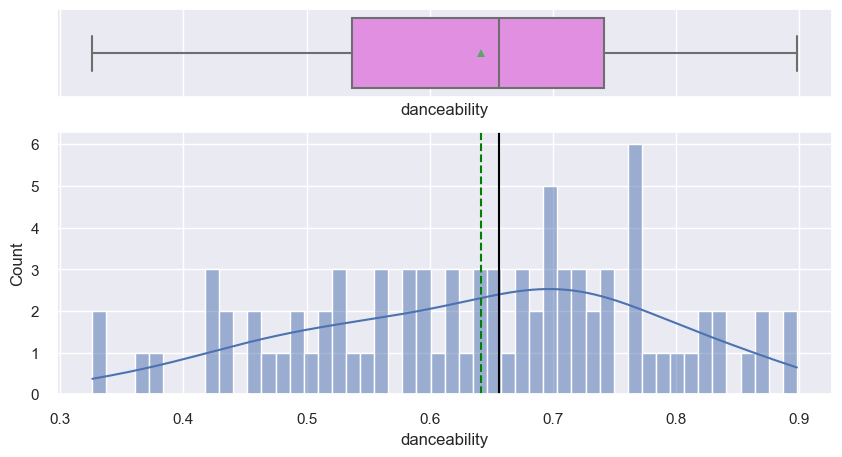

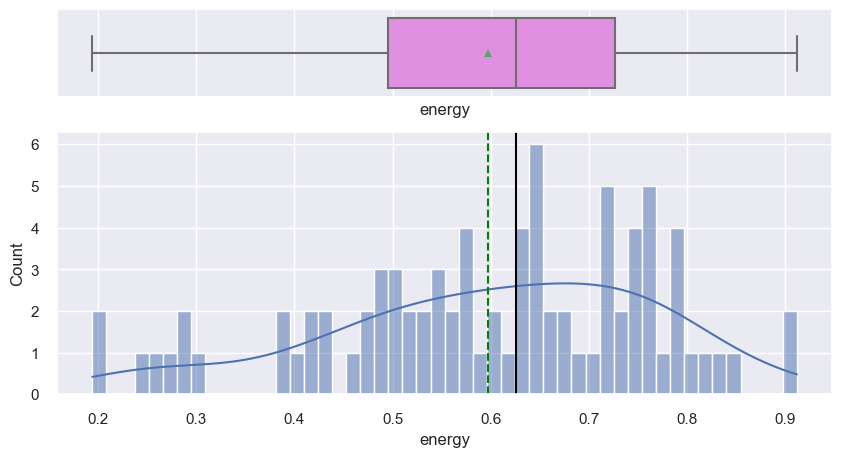

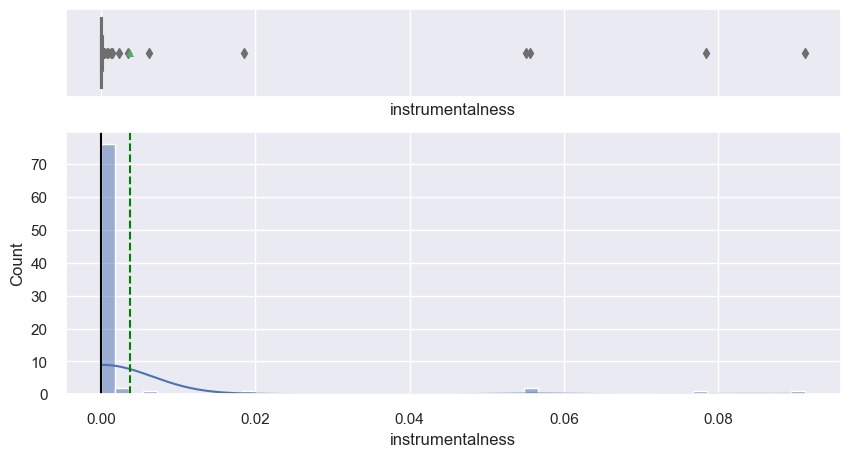

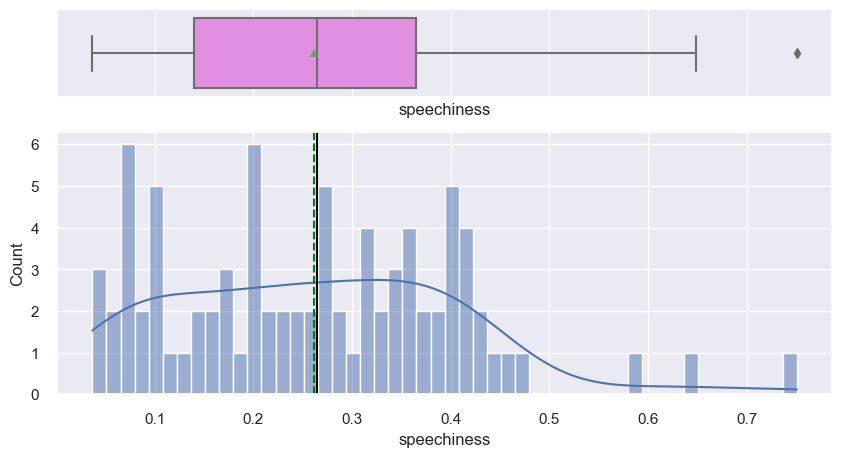

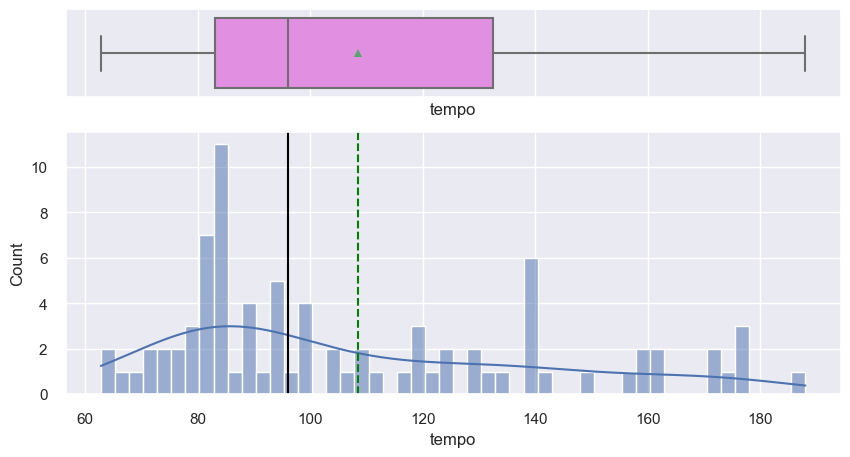

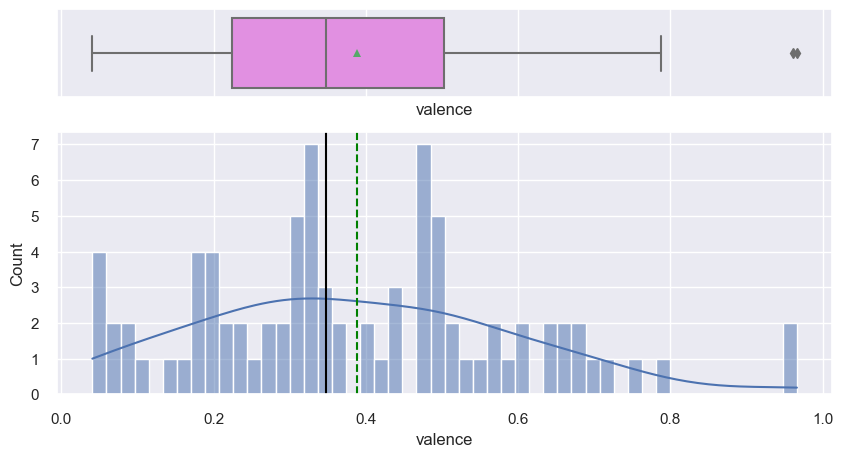

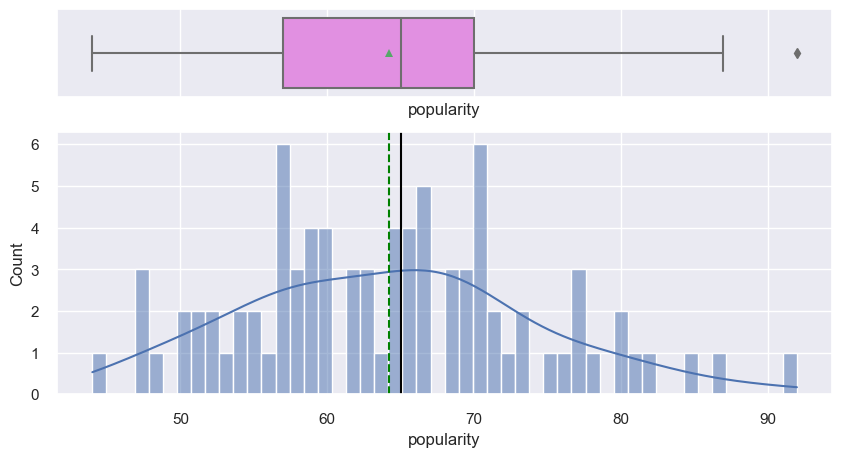

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [185]:
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))

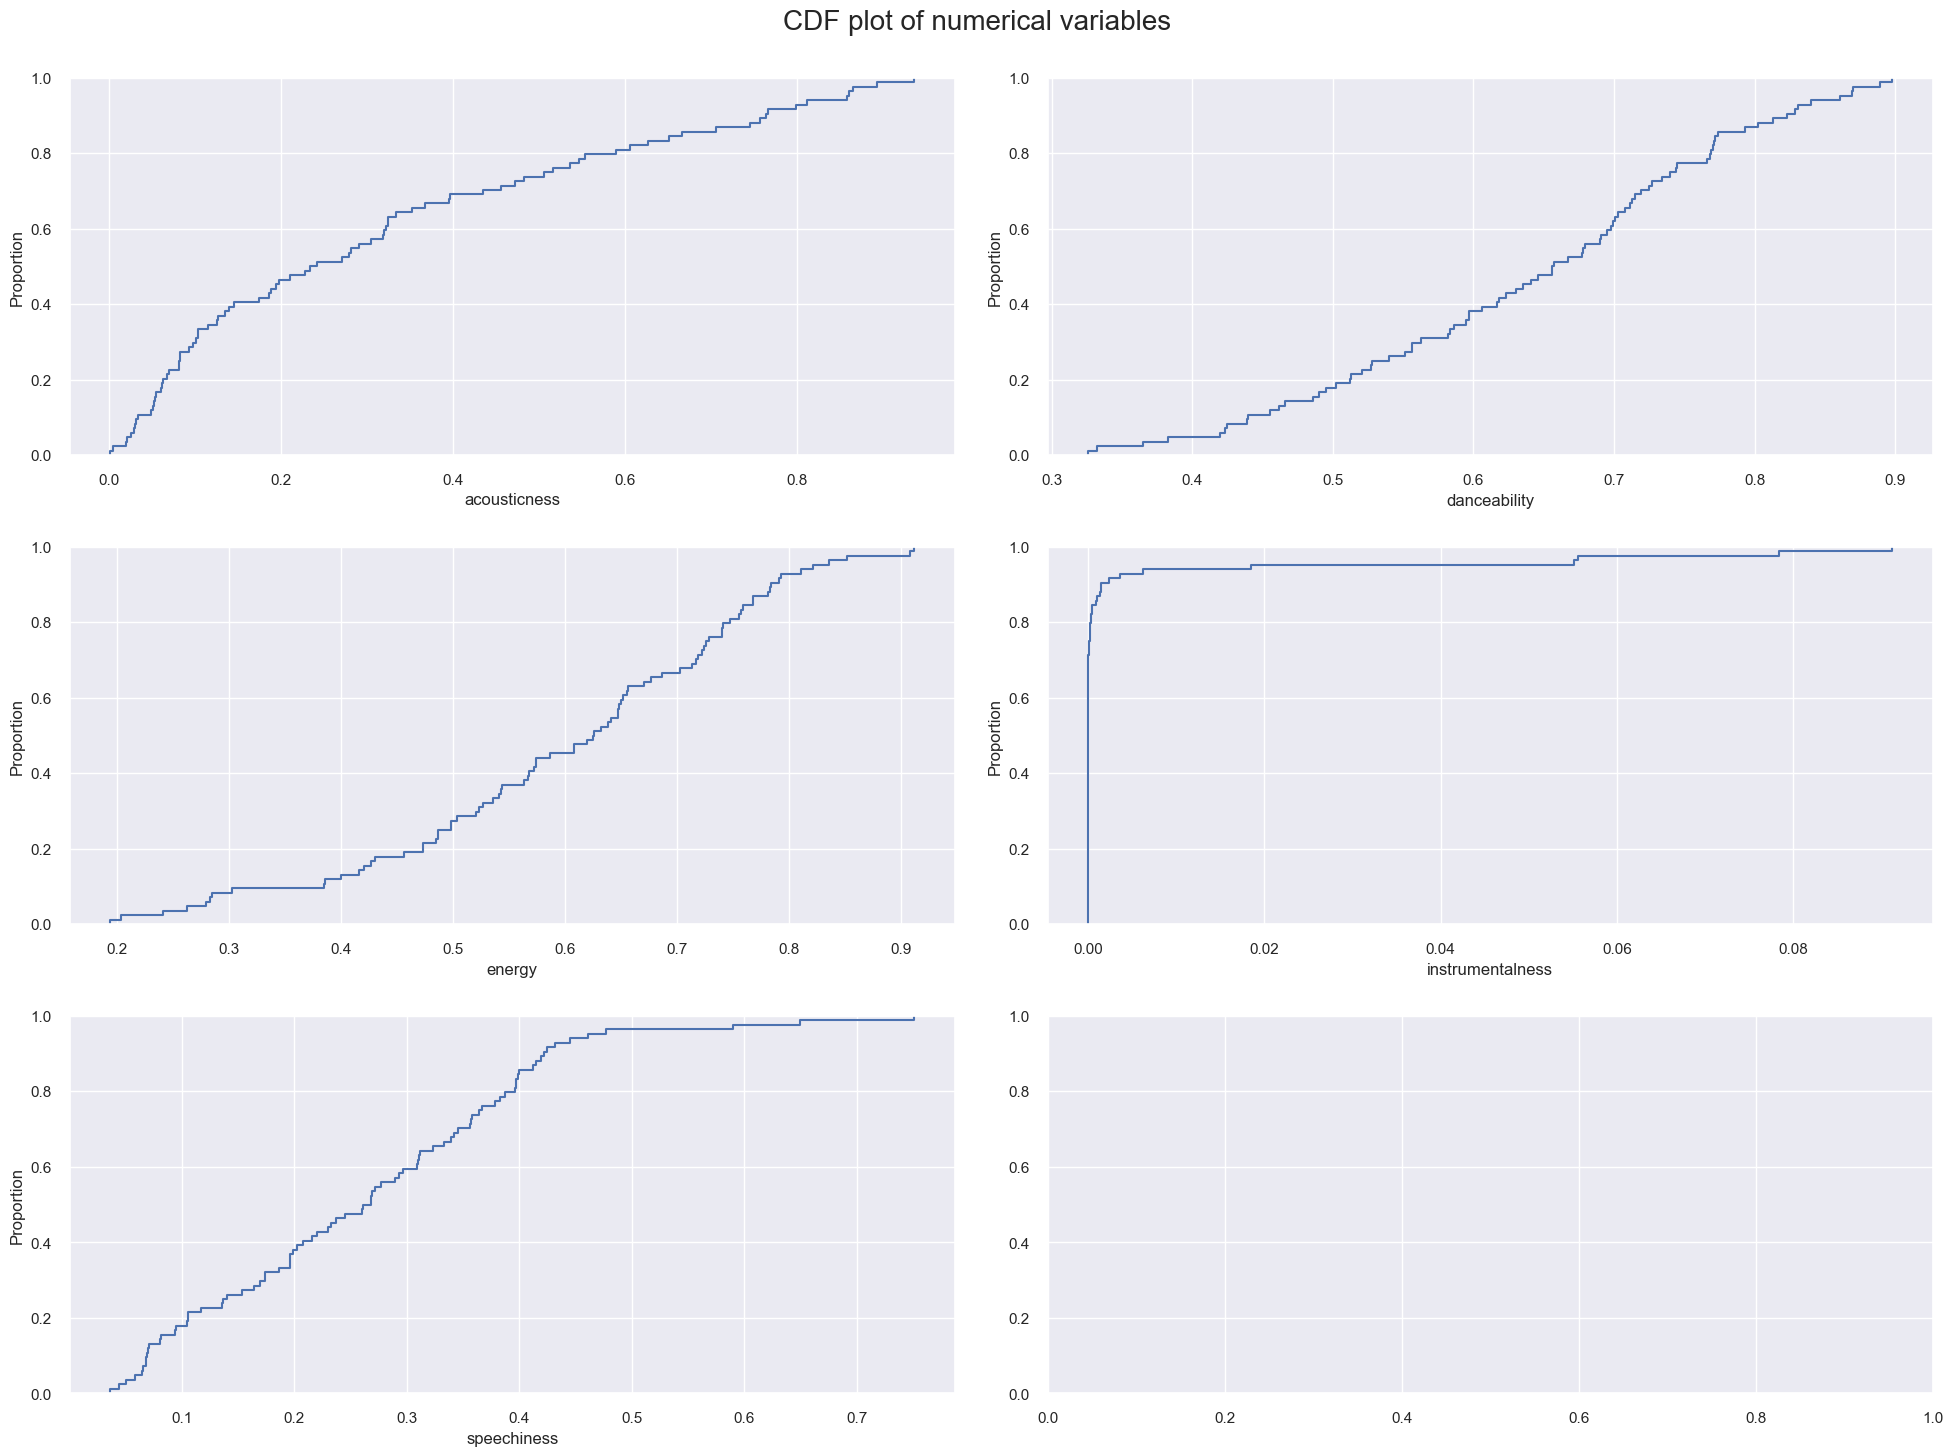

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [186]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

In [187]:
def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    df: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

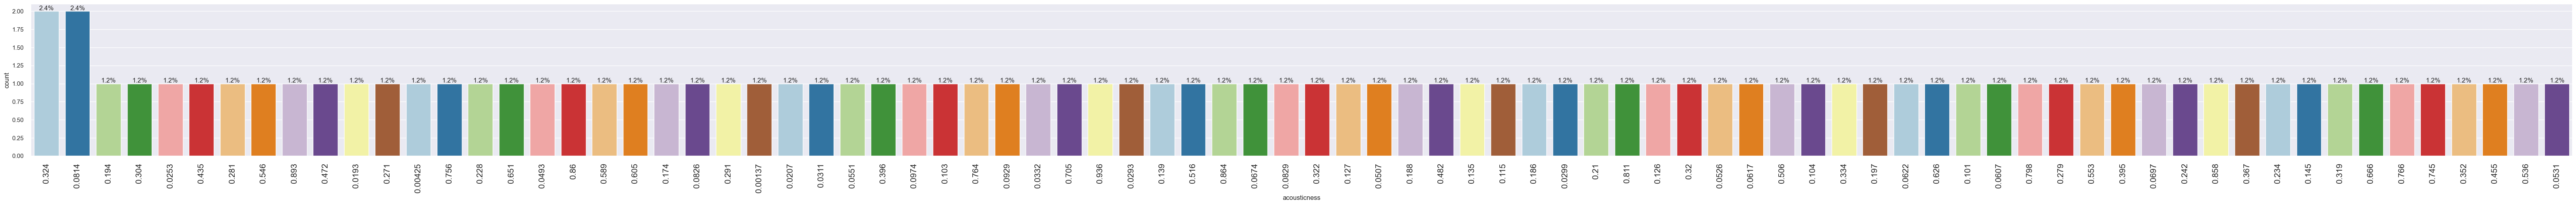

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [188]:
labeled_barplot(df, "acousticness", perc=True)

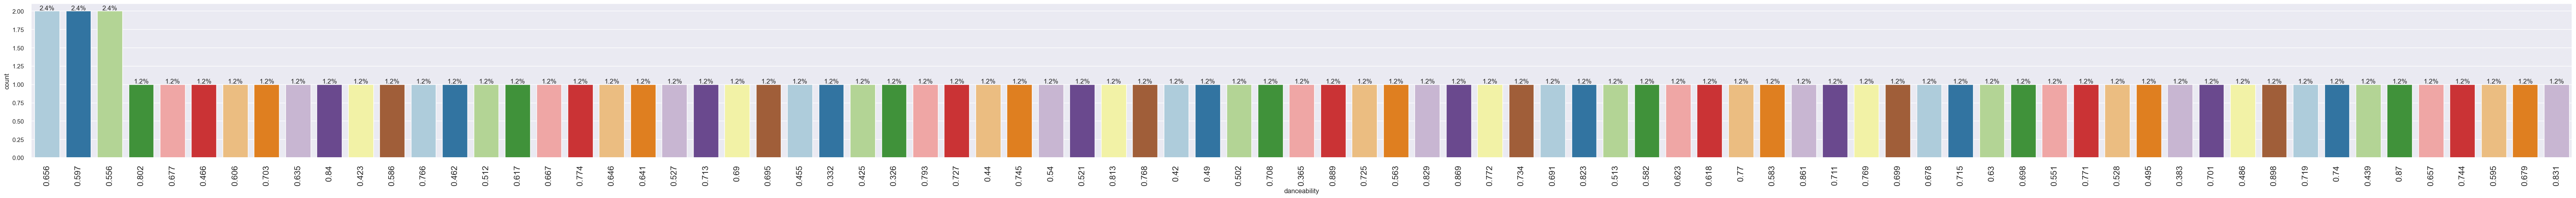

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [189]:
labeled_barplot(df, "danceability", perc=True)

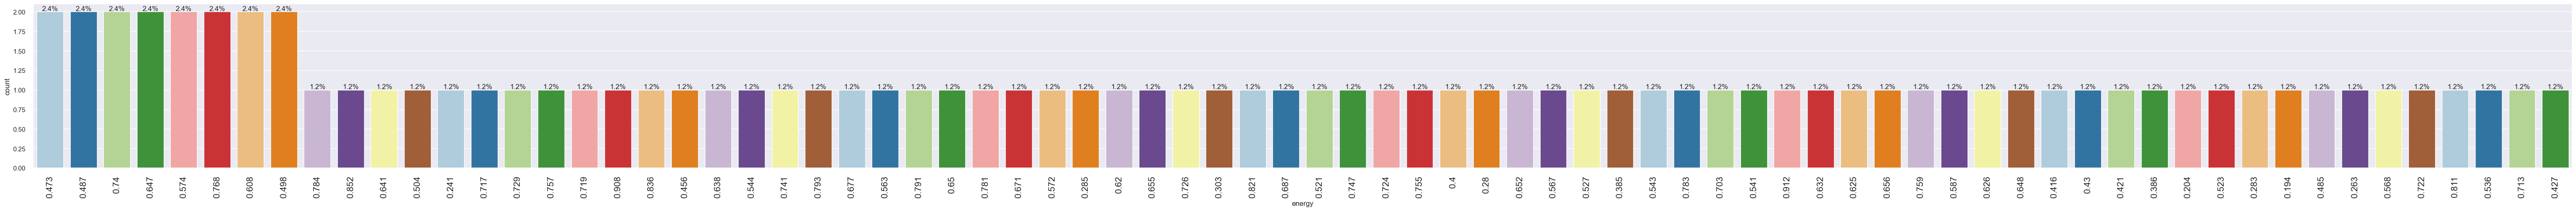

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [190]:
labeled_barplot(df, "energy", perc=True)

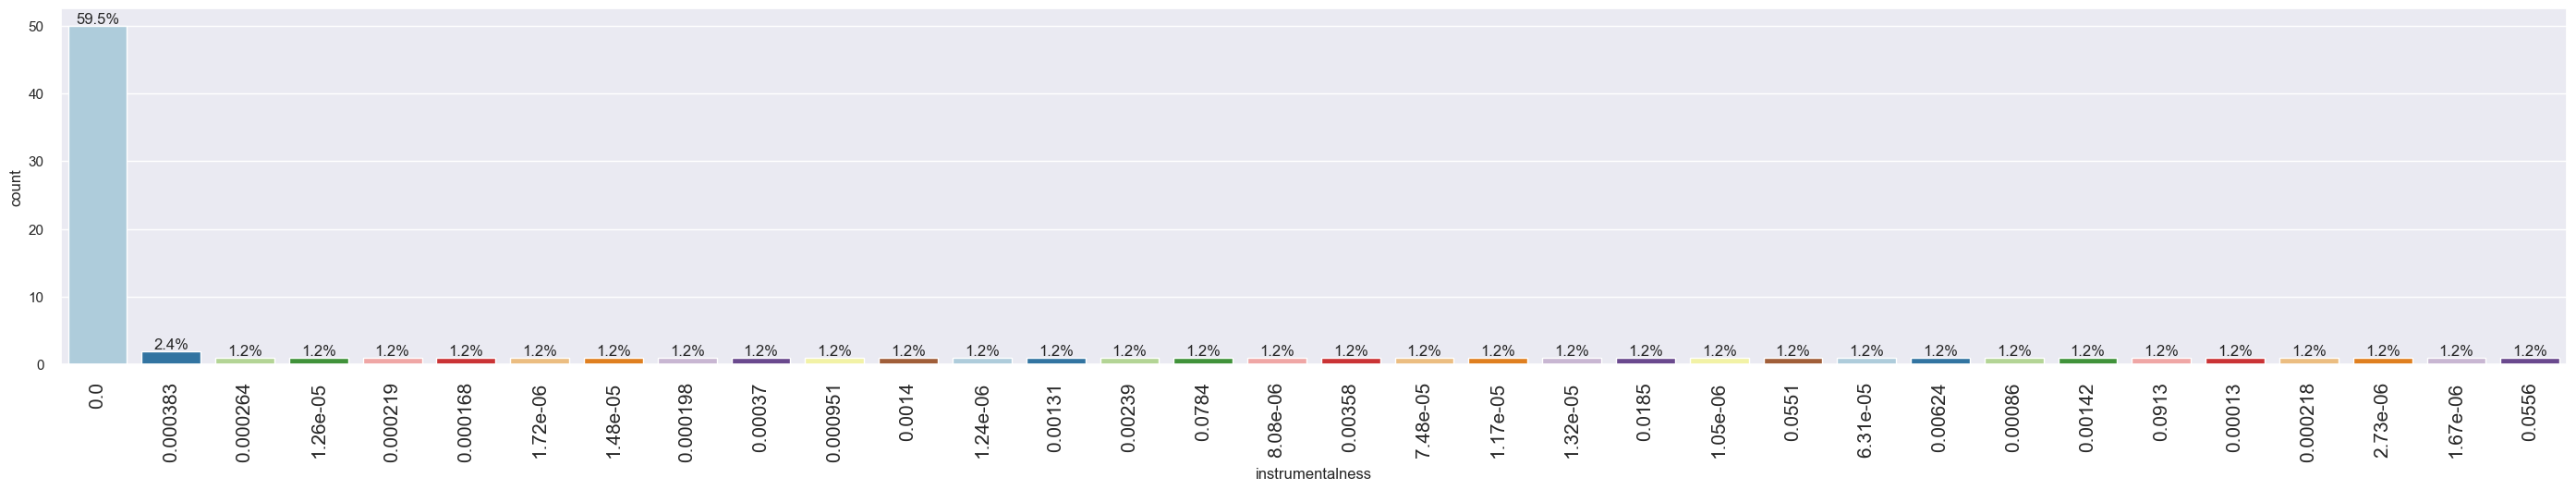

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [191]:
labeled_barplot(df, "instrumentalness", perc=True)

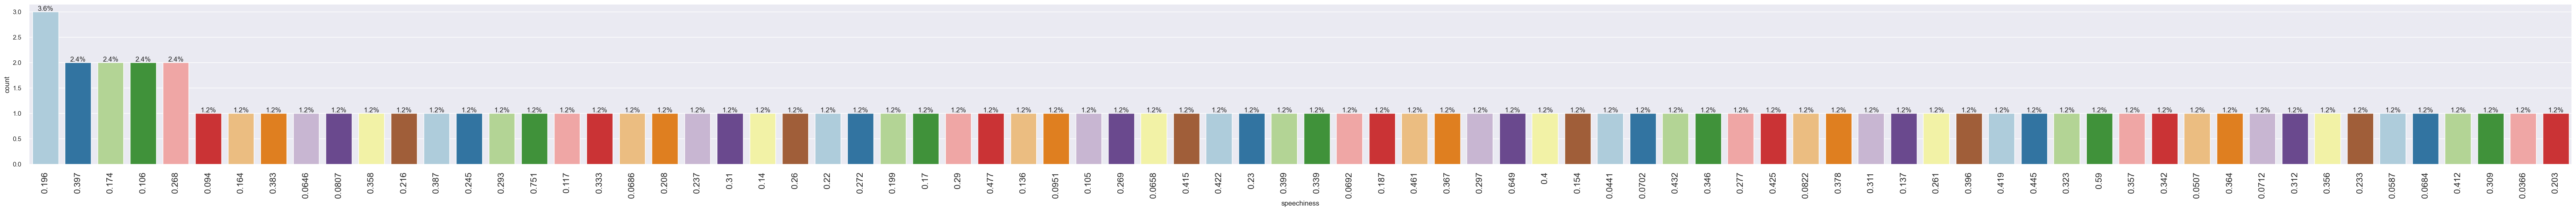

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [192]:
labeled_barplot(df, "speechiness", perc=True)

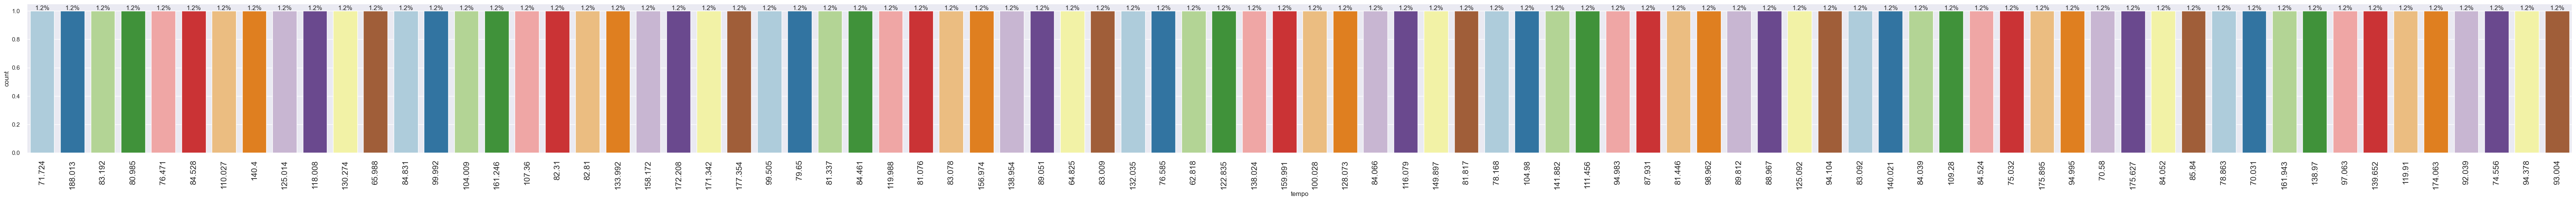

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [193]:
labeled_barplot(df, "tempo", perc=True)

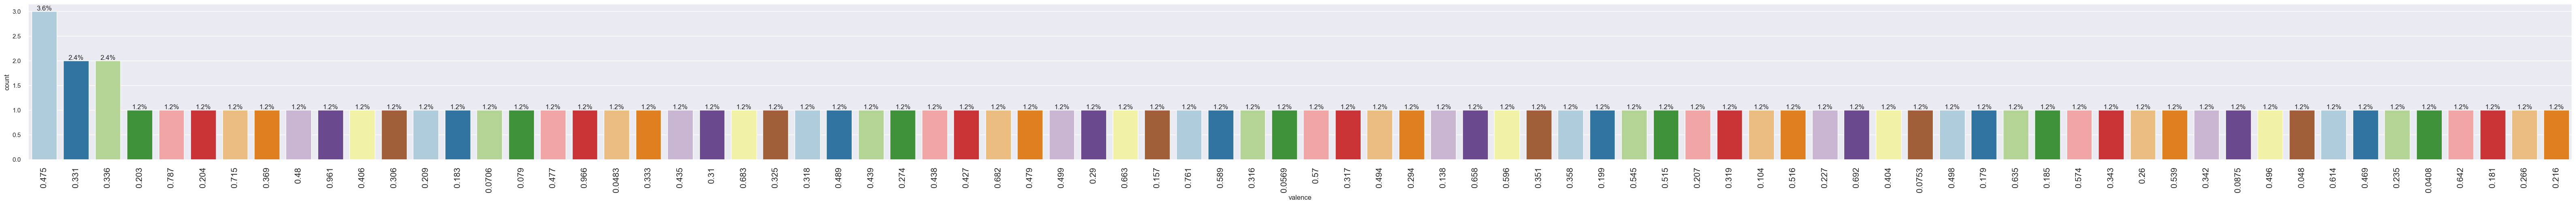

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [194]:
labeled_barplot(df, "valence", perc=True)

## Bivariate Analysis

Let's check for correlations.

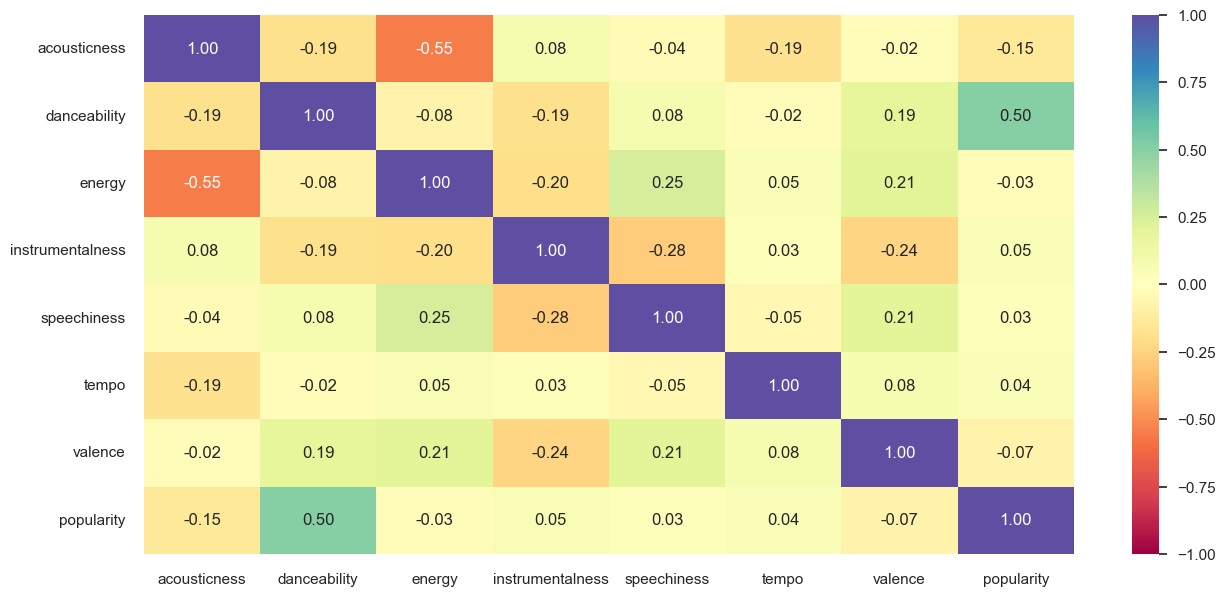

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [195]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

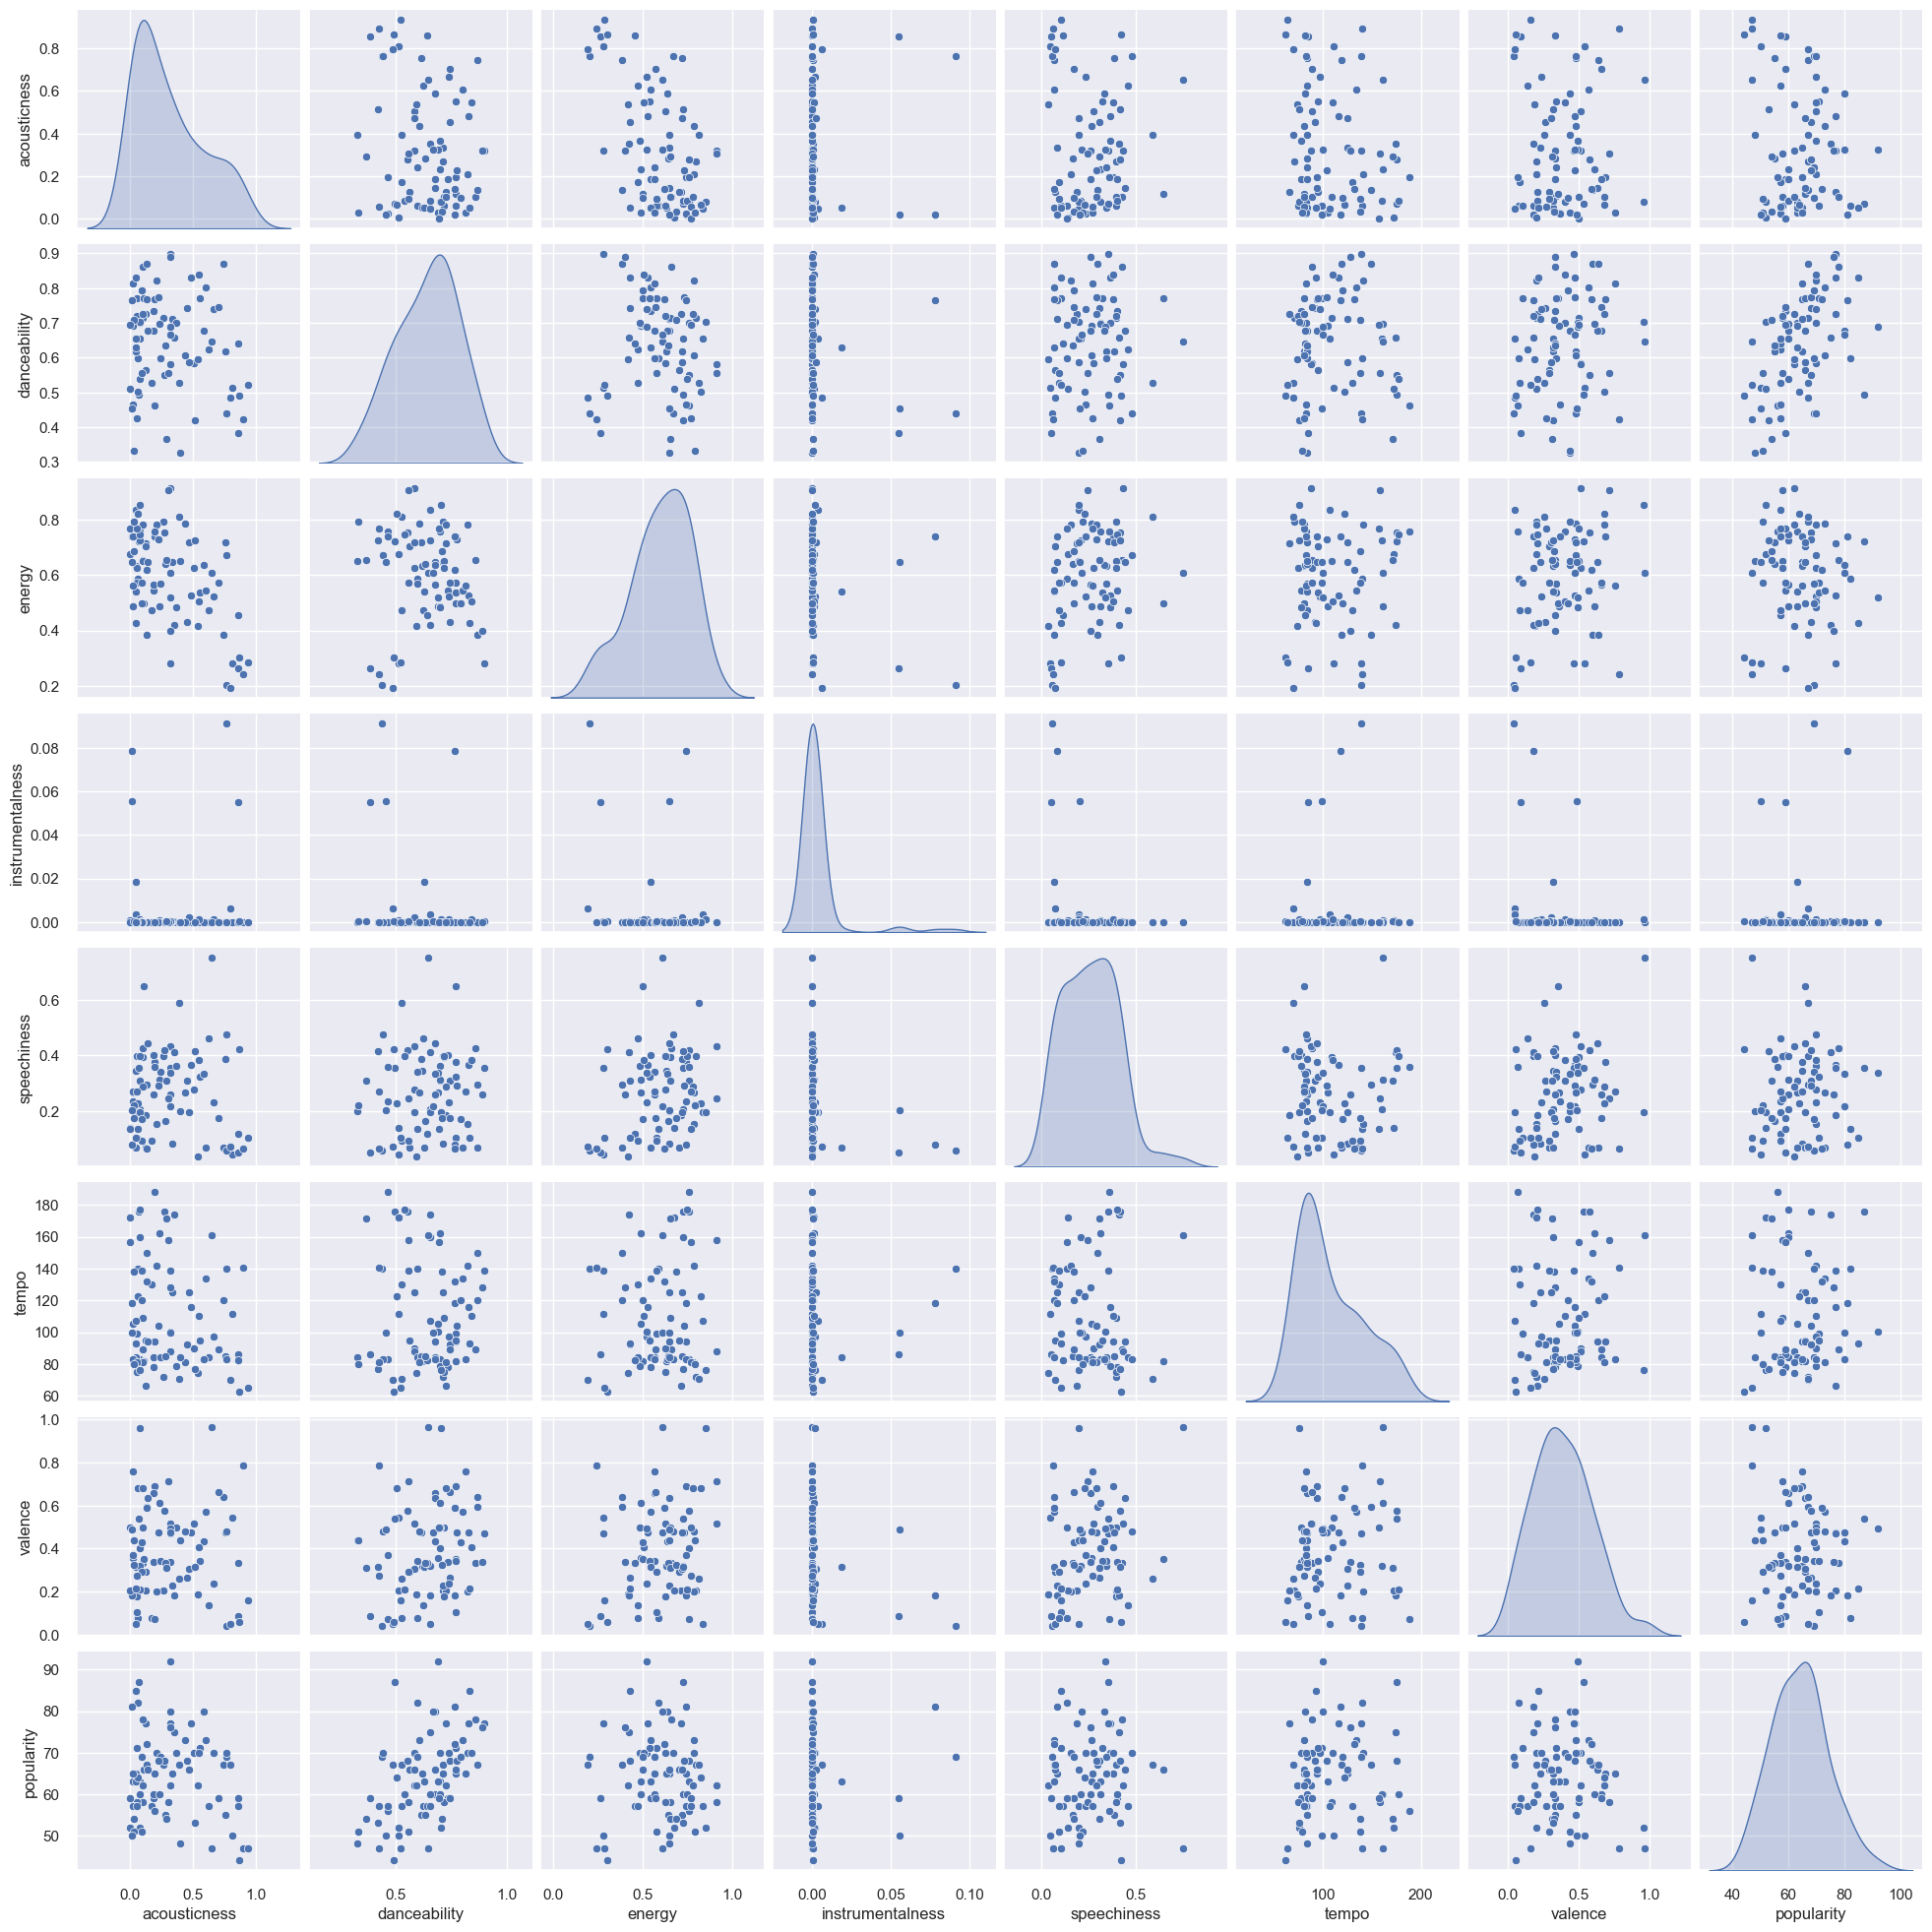

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [196]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

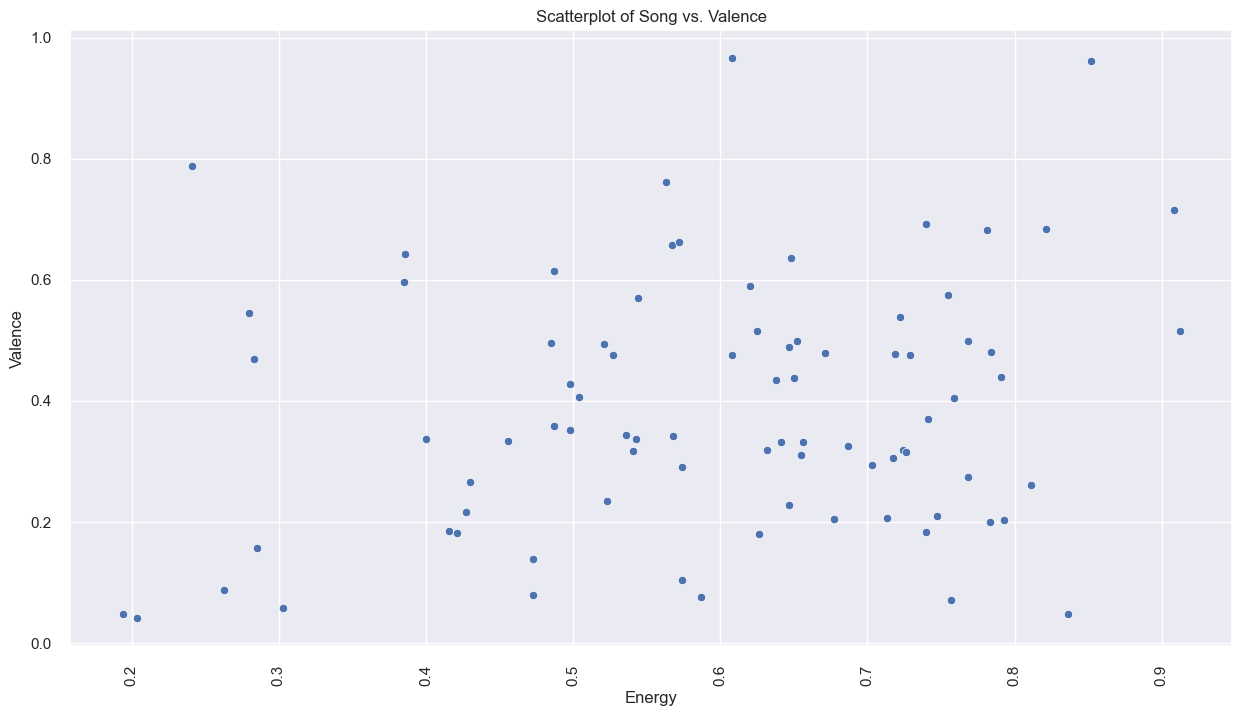

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [197]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x="energy", y="valence")
plt.xticks(rotation=90)
plt.xlabel("Energy")
plt.ylabel("Valence")
plt.title("Scatterplot of Song vs. Valence")
plt.show()

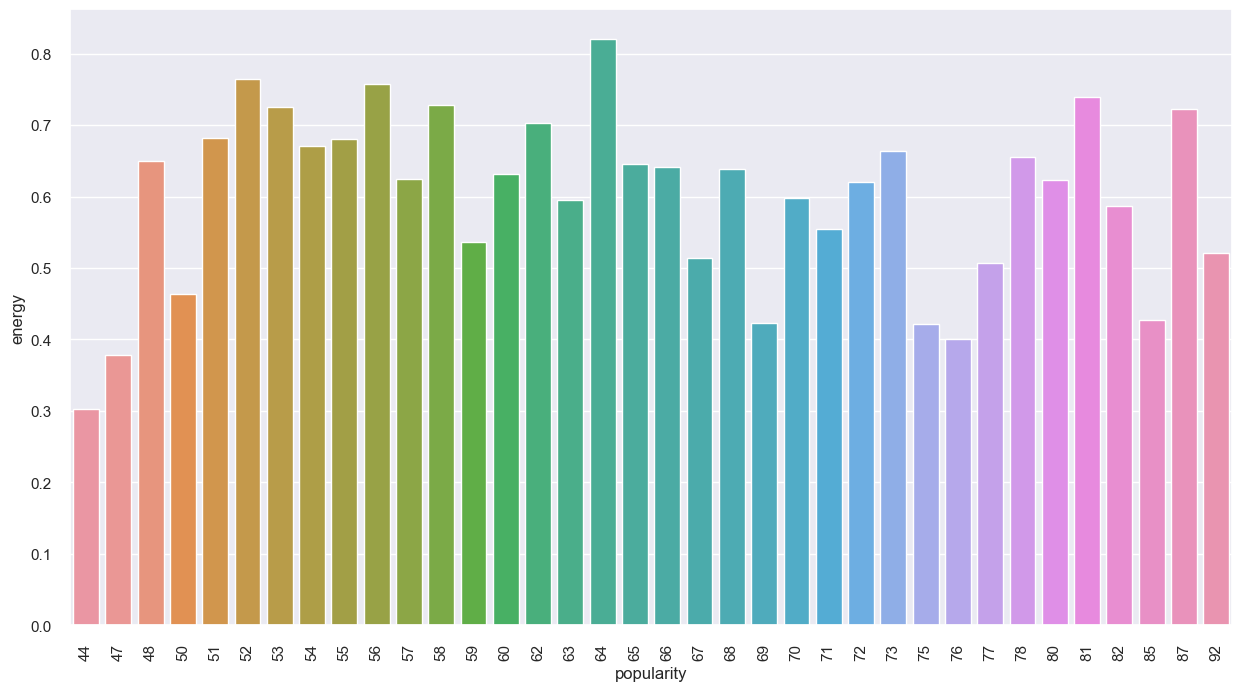

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [198]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="popularity", y="energy", ci=False)
plt.xticks(rotation=90)
plt.show()

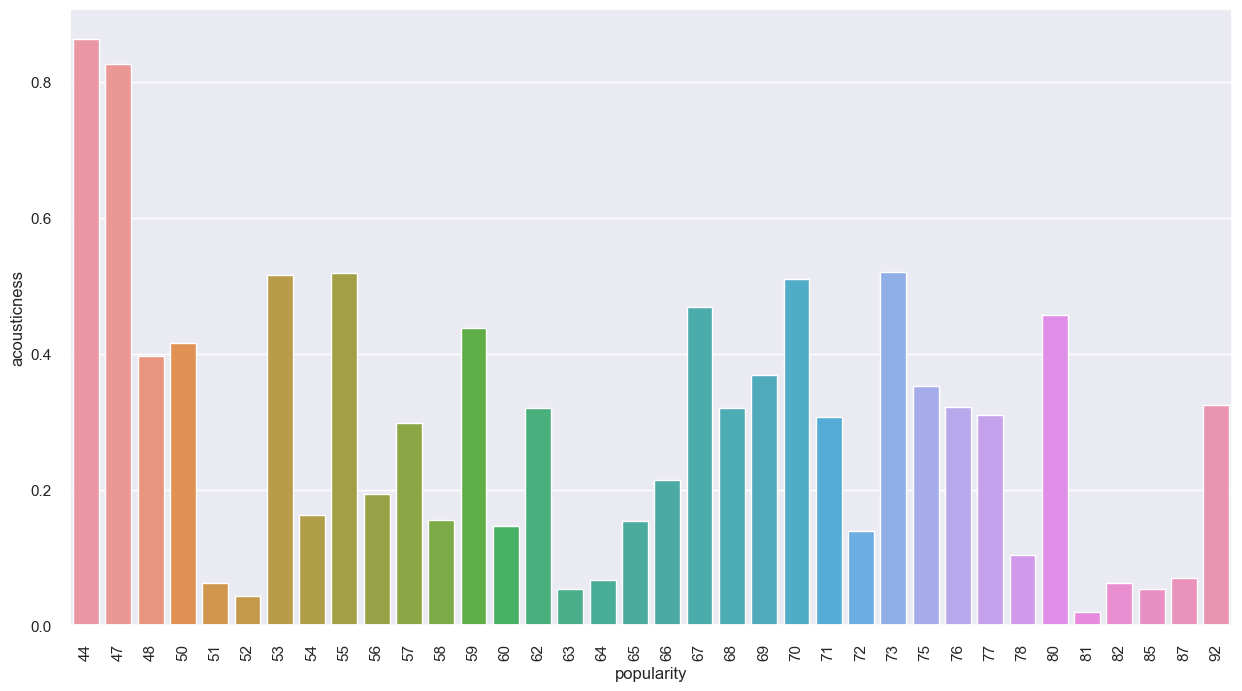

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [199]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="popularity", y="acousticness", ci=False)
plt.xticks(rotation=90)
plt.show()

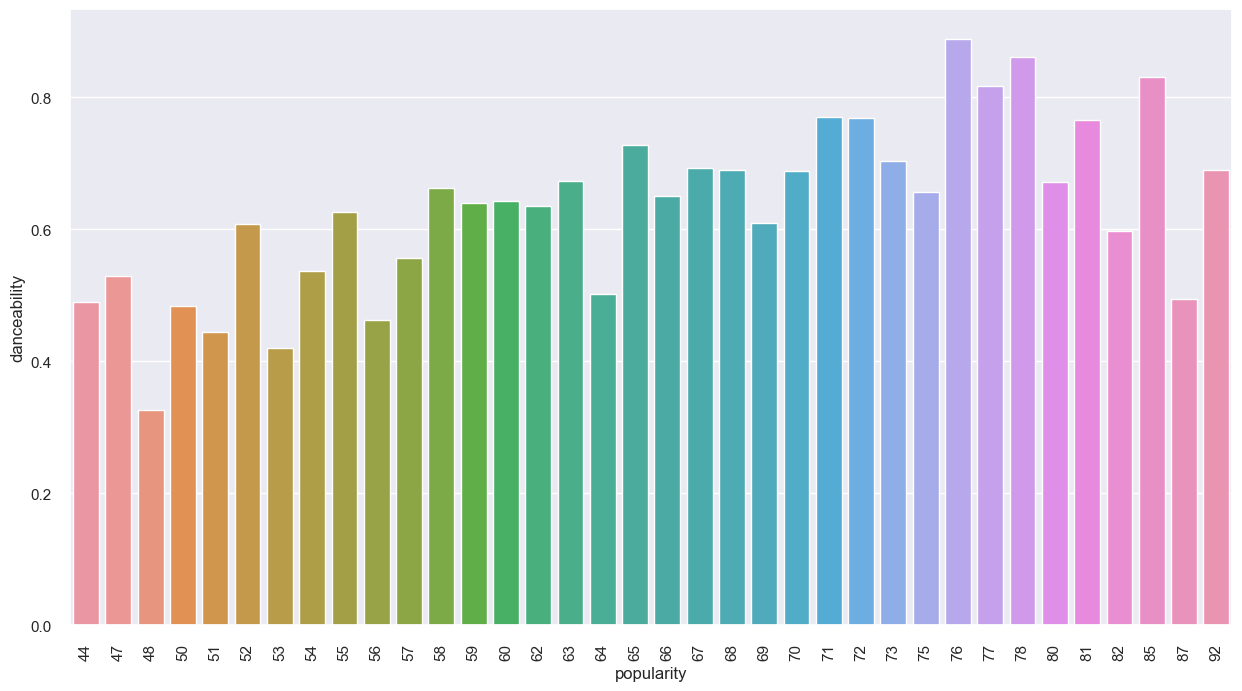

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [200]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="popularity", y="danceability", ci=False)
plt.xticks(rotation=90)
plt.show()

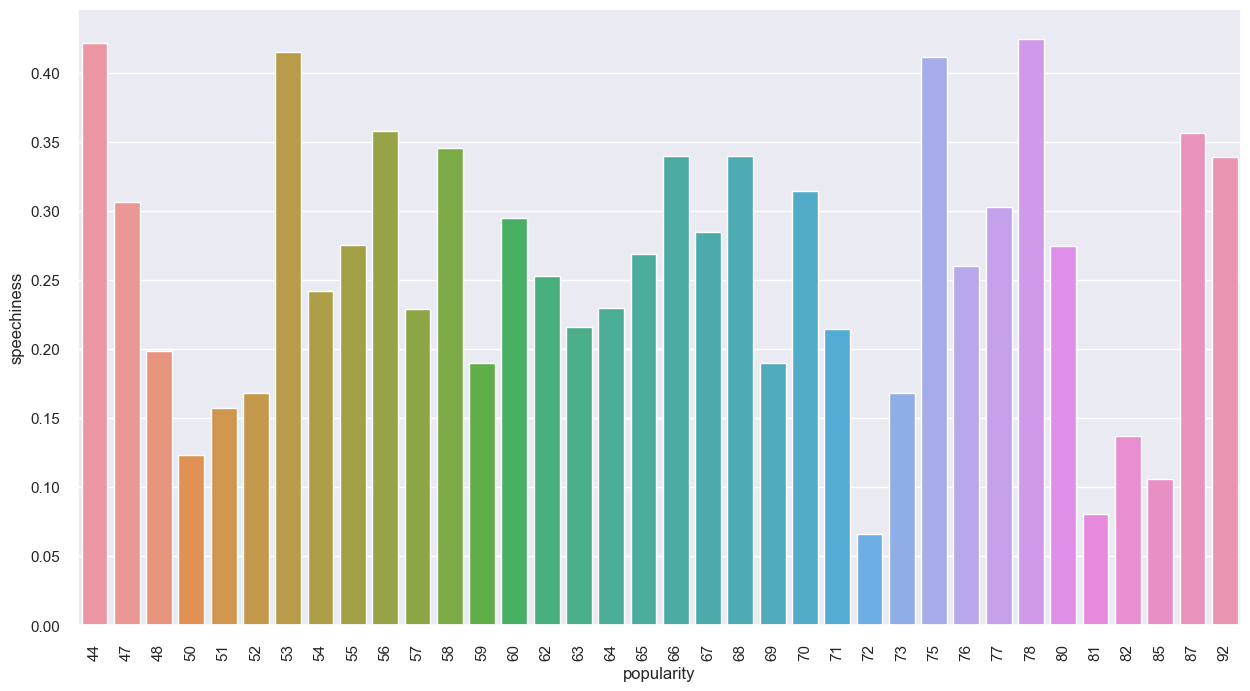

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [201]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="popularity", y="speechiness", ci=False)
plt.xticks(rotation=90)
plt.show()

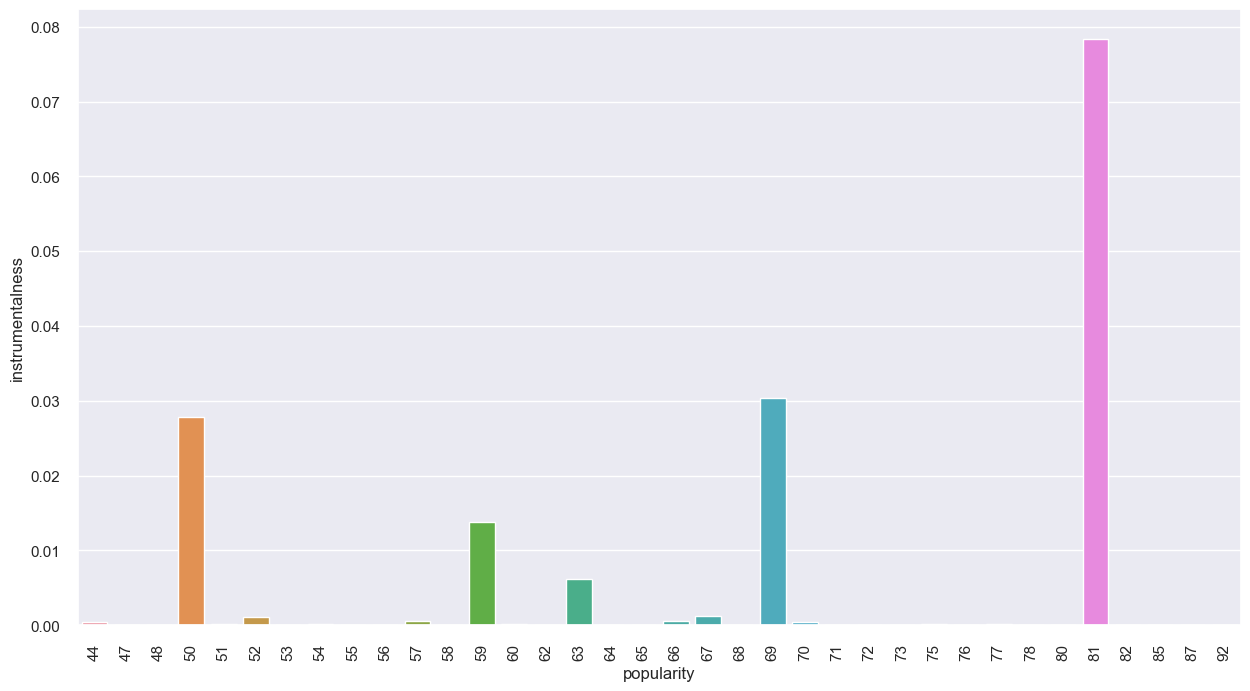

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [202]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="popularity", y="instrumentalness", ci=False)
plt.xticks(rotation=90)
plt.show()

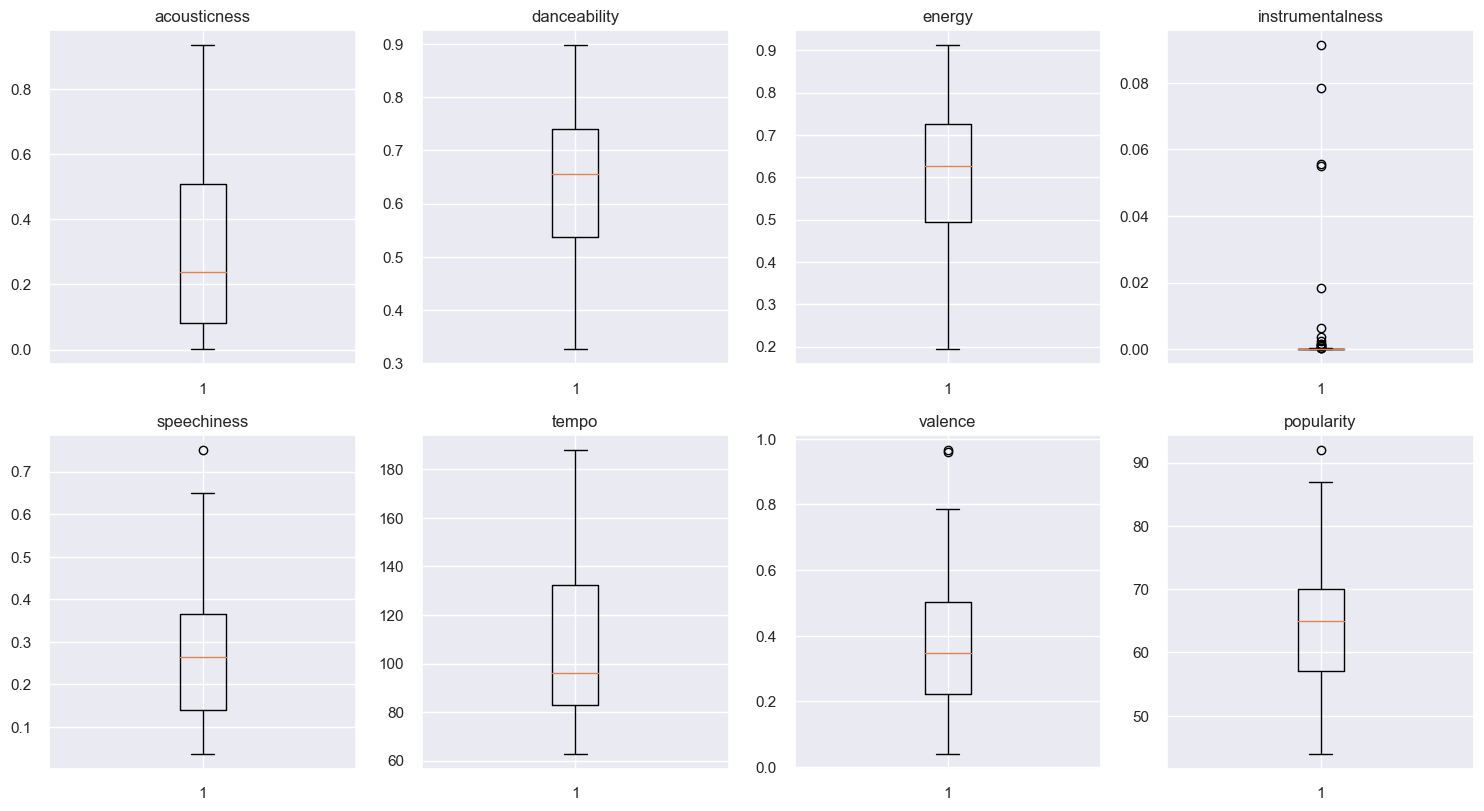

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [203]:
plt.figure(figsize=(15, 12))

num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [204]:
num_col

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'speechiness',
 'tempo',
 'valence',
 'popularity']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [205]:
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [206]:
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [207]:
subset_scaled_df.head()

,acousticness,danceability,energy,instrumentalness,speechiness,tempo,valence,popularity
0,-0.166249,0.518871,1.176146,-0.247803,0.928464,-1.126670,-0.896131,0.281261
1,-0.702143,0.605694,0.694360,-0.247803,-0.513029,-1.302078,-0.876785,1.290914
2,-0.943295,-0.320418,-0.064453,-0.247803,-0.856242,0.961866,-1.513733,1.795741
3,-0.871843,0.417577,0.971387,-0.247803,0.338138,-0.779034,0.075977,-0.122601
4,-0.441639,0.924045,0.856963,-0.247803,0.798043,-0.442285,1.468847,0.079330


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.6382340567884404
Number of Clusters: 2 	Average Distortion: 2.439693597799555
Number of Clusters: 3 	Average Distortion: 2.2336829546086983
Number of Clusters: 4 	Average Distortion: 2.145247230665532
Number of Clusters: 5 	Average Distortion: 1.9973483951571684
Number of Clusters: 6 	Average Distortion: 1.9150319662942514
Number of Clusters: 7 	Average Distortion: 1.8467520059785951
Number of Clusters: 8 	Average Distortion: 1.7663913901555035


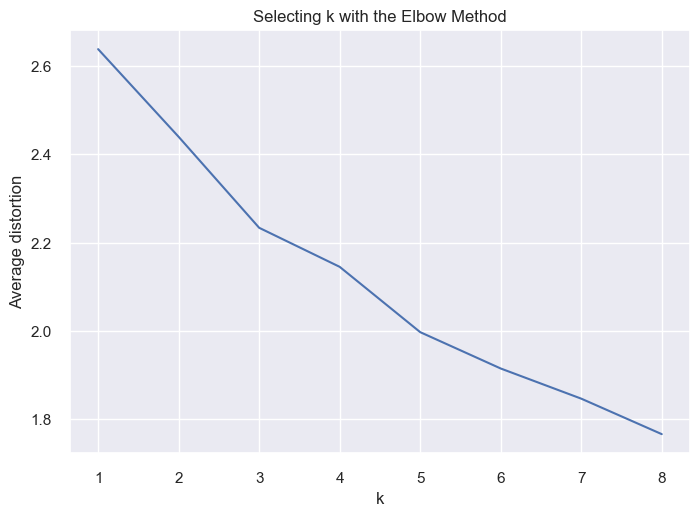

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [208]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

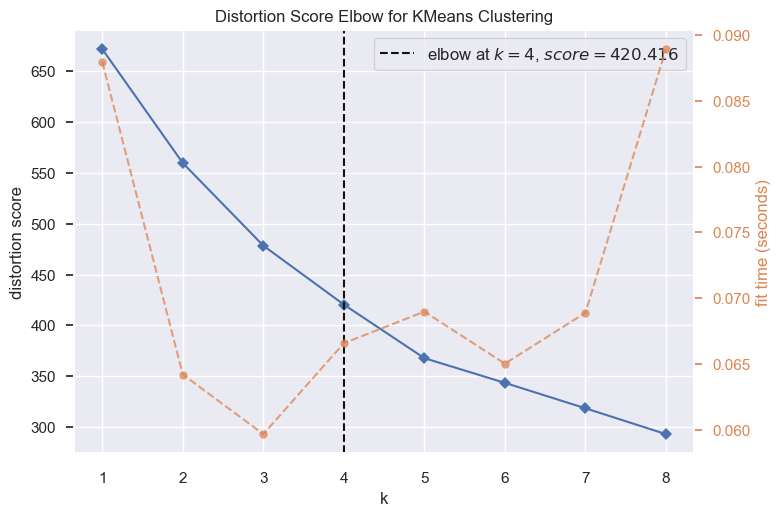

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [209]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 9), timings=True)
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Silhouette Scores

For n_clusters = 2, the silhouette score is 0.32080522679005474)
For n_clusters = 3, the silhouette score is 0.1746350284371139)
For n_clusters = 4, the silhouette score is 0.17301163772515304)
For n_clusters = 5, the silhouette score is 0.16344485955063148)
For n_clusters = 6, the silhouette score is 0.15302265939875315)
For n_clusters = 7, the silhouette score is 0.15250533508729688)
For n_clusters = 8, the silhouette score is 0.15345292134494967)
For n_clusters = 9, the silhouette score is 0.15405536467812445)
For n_clusters = 10, the silhouette score is 0.1593085786009578)
For n_clusters = 11, the silhouette score is 0.1776119456379088)
For n_clusters = 12, the silhouette score is 0.1684365759041963)
For n_clusters = 13, the silhouette score is 0.1725082770351605)
For n_clusters = 14, the silhouette score is 0.16838667342829164)


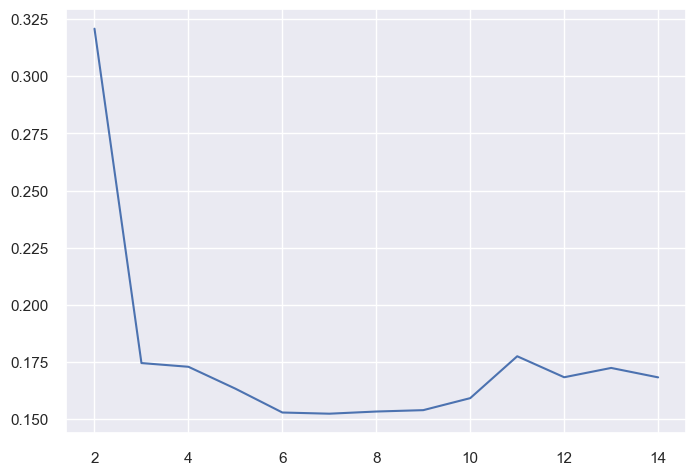

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [210]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

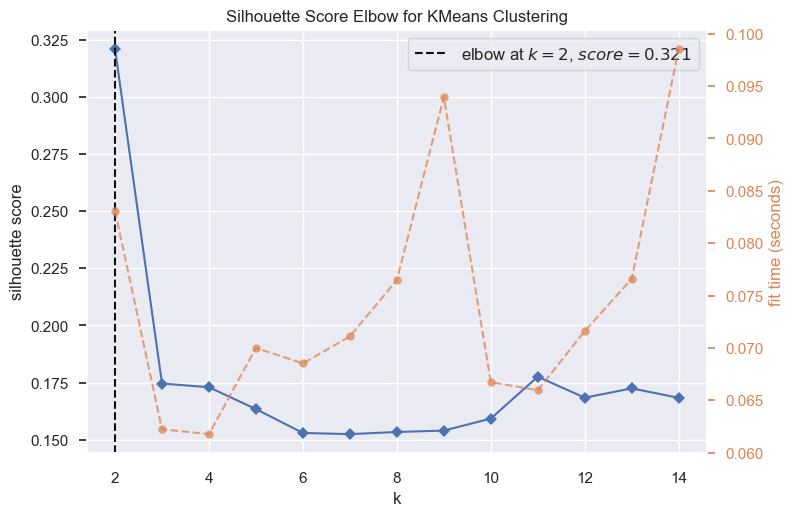

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [211]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()

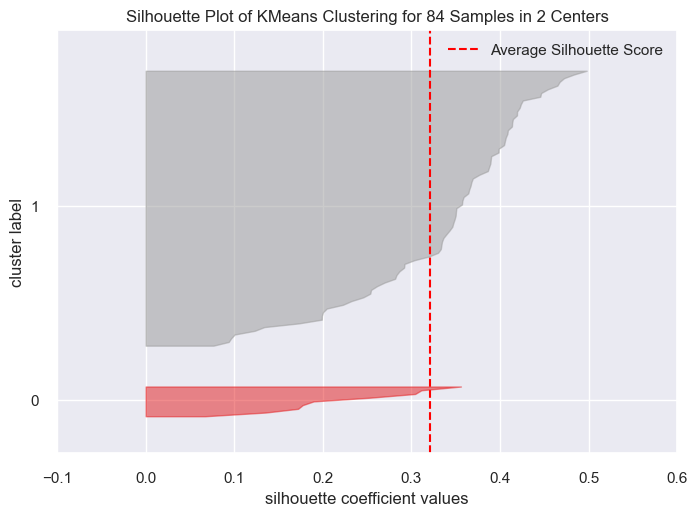

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 84 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [212]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

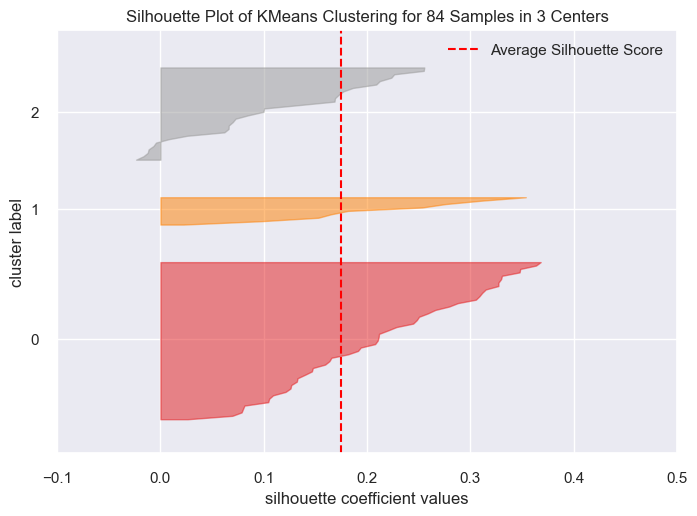

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 84 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [213]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

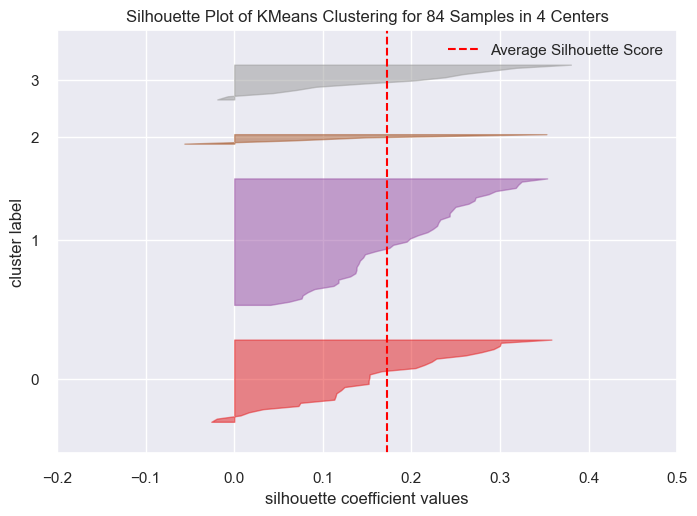

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 84 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [214]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

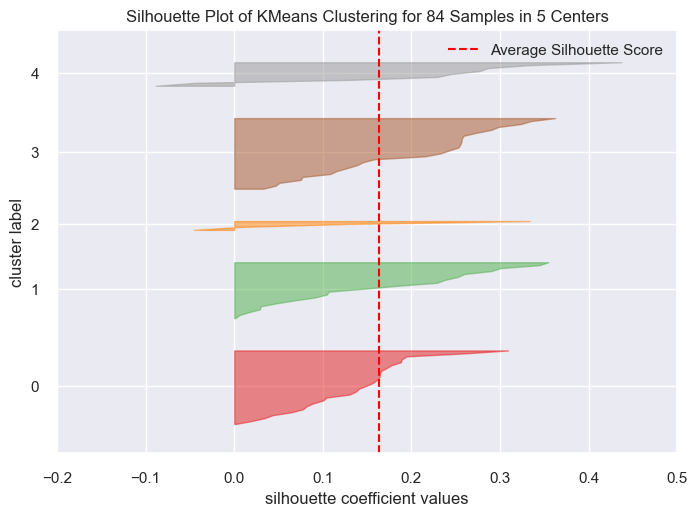

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 84 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [215]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

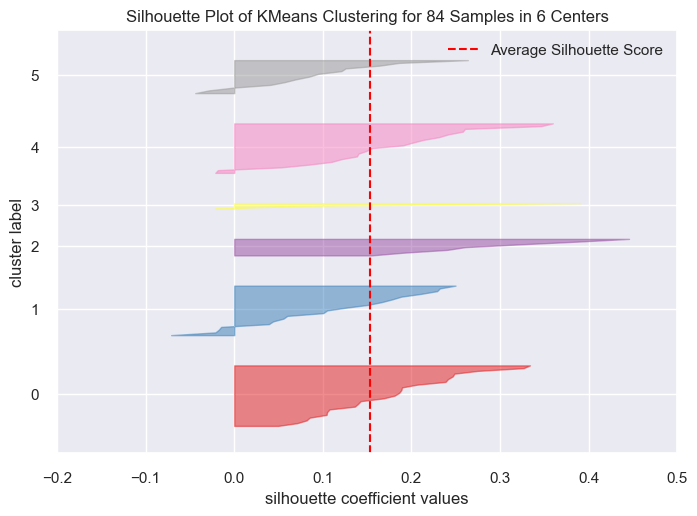

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 84 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [216]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

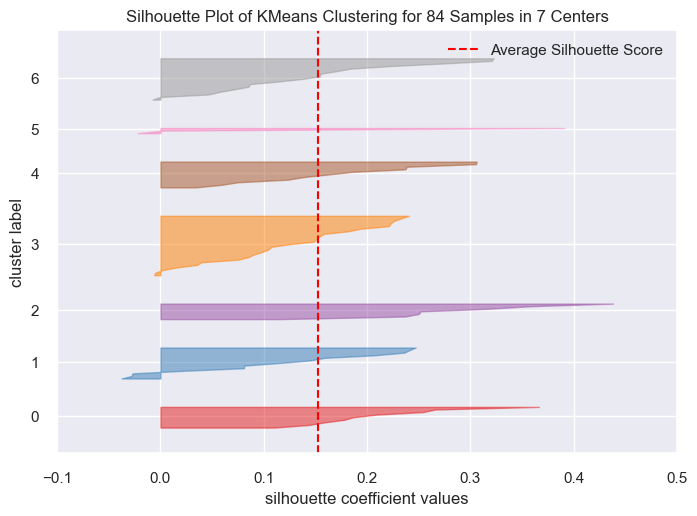

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 84 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [217]:
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

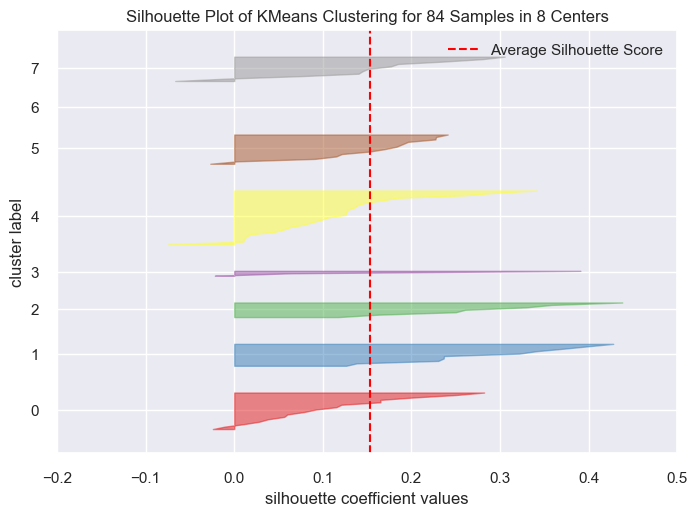

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 84 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [218]:
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [219]:
kmeans = KMeans(n_clusters=7, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=7, random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [220]:
df1 = df.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [221]:
df1["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Cluster Profiles

In [222]:
df1["K_means_segments"].dtype

dtype('int32')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [223]:
cluster_profile = (
    df1.groupby("K_means_segments")[["K_means_segments"]].mean().astype(float)
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [224]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("K_means_segments")["song"].count().values
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [225]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,K_means_segments,count_in_each_segments
K_means_segments,,
0,0.000000,9
1,1.000000,13
2,2.000000,7
3,3.000000,24
4,4.000000,11
5,5.000000,3
6,6.000000,17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [226]:
for cl in df1["K_means_segments"].unique():
    print("In cluster {}, the following songs are present:".format(cl))
    print(df1[df1["K_means_segments"] == cl]["song"].unique())
    print()

In cluster 3, the following songs are present:
['9 5  s o u t h' 'a p p l y i n g  p r e s s u r e'
 'p u n c h i n   t h e  c l o c k' 'l e t  g o  m y  h a n d'
 't h e  c l i m b  b a c k' 'c l o s e' 'the cut off' 'atm' 'brackets'
 'once an addict  interlude' 'friends' 'window pain  outro'
 '1985  intro to the fall off' 'january 28th' '03 adolescence'
 'kerney sermon  skit' 'land of the snakes' 'mo money  interlude'
 'aint that some shit  interlude' 'crooked smile' 'dollar and a dream iii'
 'lights please' 'in the morning' 'lost ones']

In cluster 0, the following songs are present:
['a m a r i' 'm y  l i f e' '1 0 0  m i l' 'i n t e r l u d e' 'kod'
 'photograph' 'cant get enough' 'nobodys perfect' 'work out']

In cluster 6, the following songs are present:
['p r i d e  i s  t h e  d e v i l' 'motiv8' 'kevins heart' 'immortal'
 'deja vu' 'ville mentality' 'change' 'neighbors' '4 your eyez only'
 'a tale of 2 citiez' 'gomd' 'no role modelz' 'apparently' 'love yourz'
 'power trip' '

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [227]:
df1.groupby(["K_means_segments", "album"])["song"].count()

K_means_segments  album                        
0                 cole world the sideline story    3
                  kod                              2
                  the offseason                    4
1                 2014 forest hills drive          1
                  born sinner                      6
                  cole world the sideline story    5
                  the offseason                    1
2                 2014 forest hills drive          1
                  4 your eyez only                 2
                  born sinner                      1
                  cole world the sideline story    2
                  kod                              1
3                 2014 forest hills drive          2
                  born sinner                      5
                  cole world the sideline story    4
                  kod                              7
                  the offseason                    6
4                 2014 forest hills drive          

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

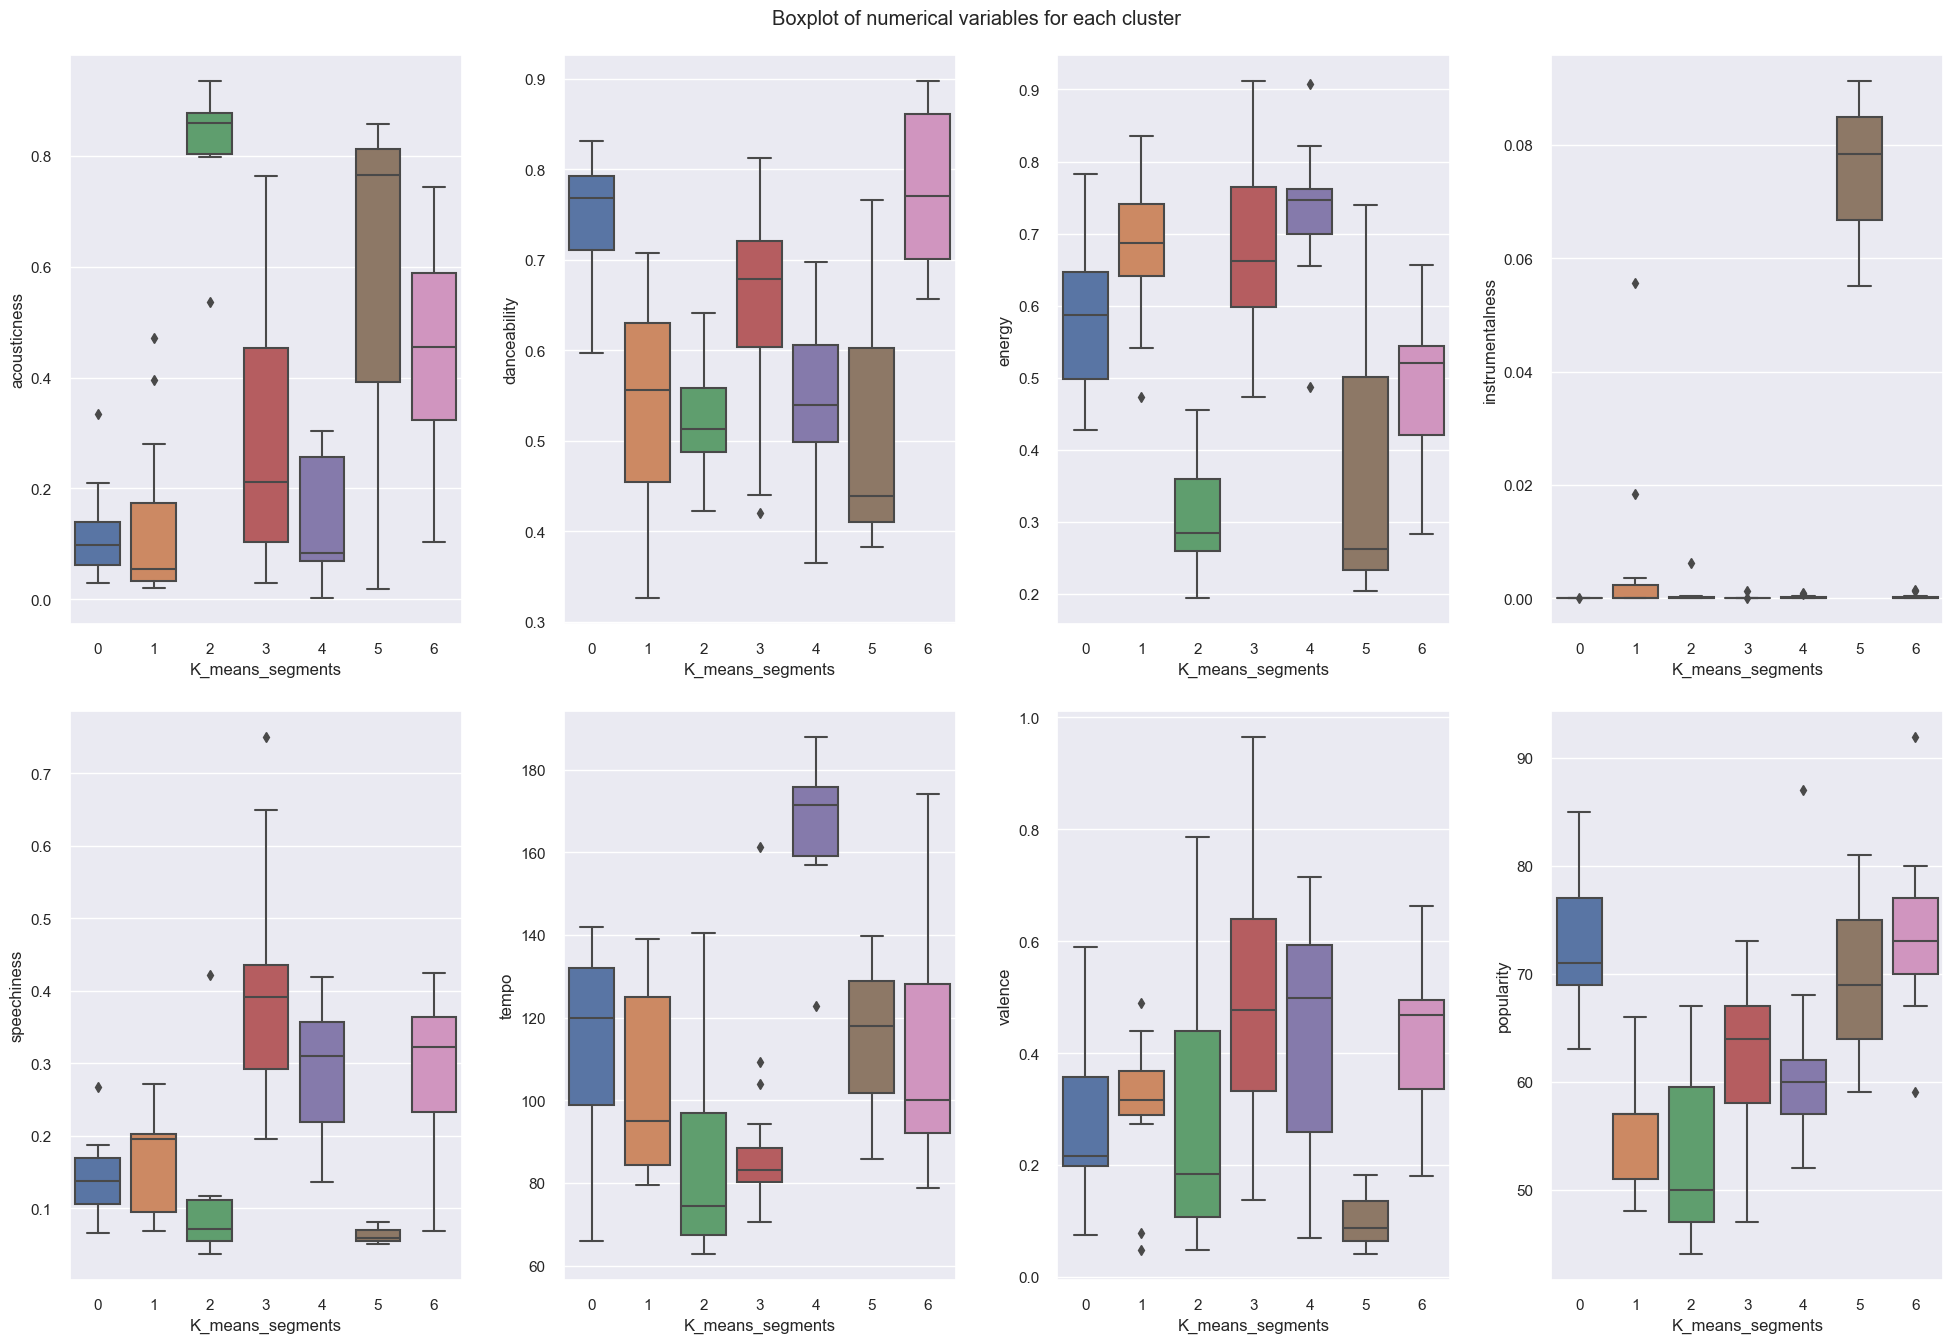

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [228]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)


## Hierarchichal Clustering

In [229]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm

Cophenetic correlation for Euclidean distance and single linkage is 0.6843700042444473.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7316803858089694.
Cophenetic correlation for Euclidean distance and average linkage is 0.8016136254147901.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7652542672998434.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7241724572731585.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6017814995082164.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7561113786213659.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.7138261469327725.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.5463718869265739.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.49902578467843756.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6328111476892485.
Cophenetic c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [230]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8016136254147901, which is obtained with Euclidean distance and 0 linkage.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [231]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.6843700042444473.
Cophenetic correlation for complete linkage is 0.7316803858089694.
Cophenetic correlation for average linkage is 0.8016136254147901.
Cophenetic correlation for centroid linkage is 0.7958681894121638.
Cophenetic correlation for ward linkage is 0.6828426365438347.
Cophenetic correlation for weighted linkage is 0.7652542672998434.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [232]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8016136254147901, which is obtained with average linkage.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Dendograms

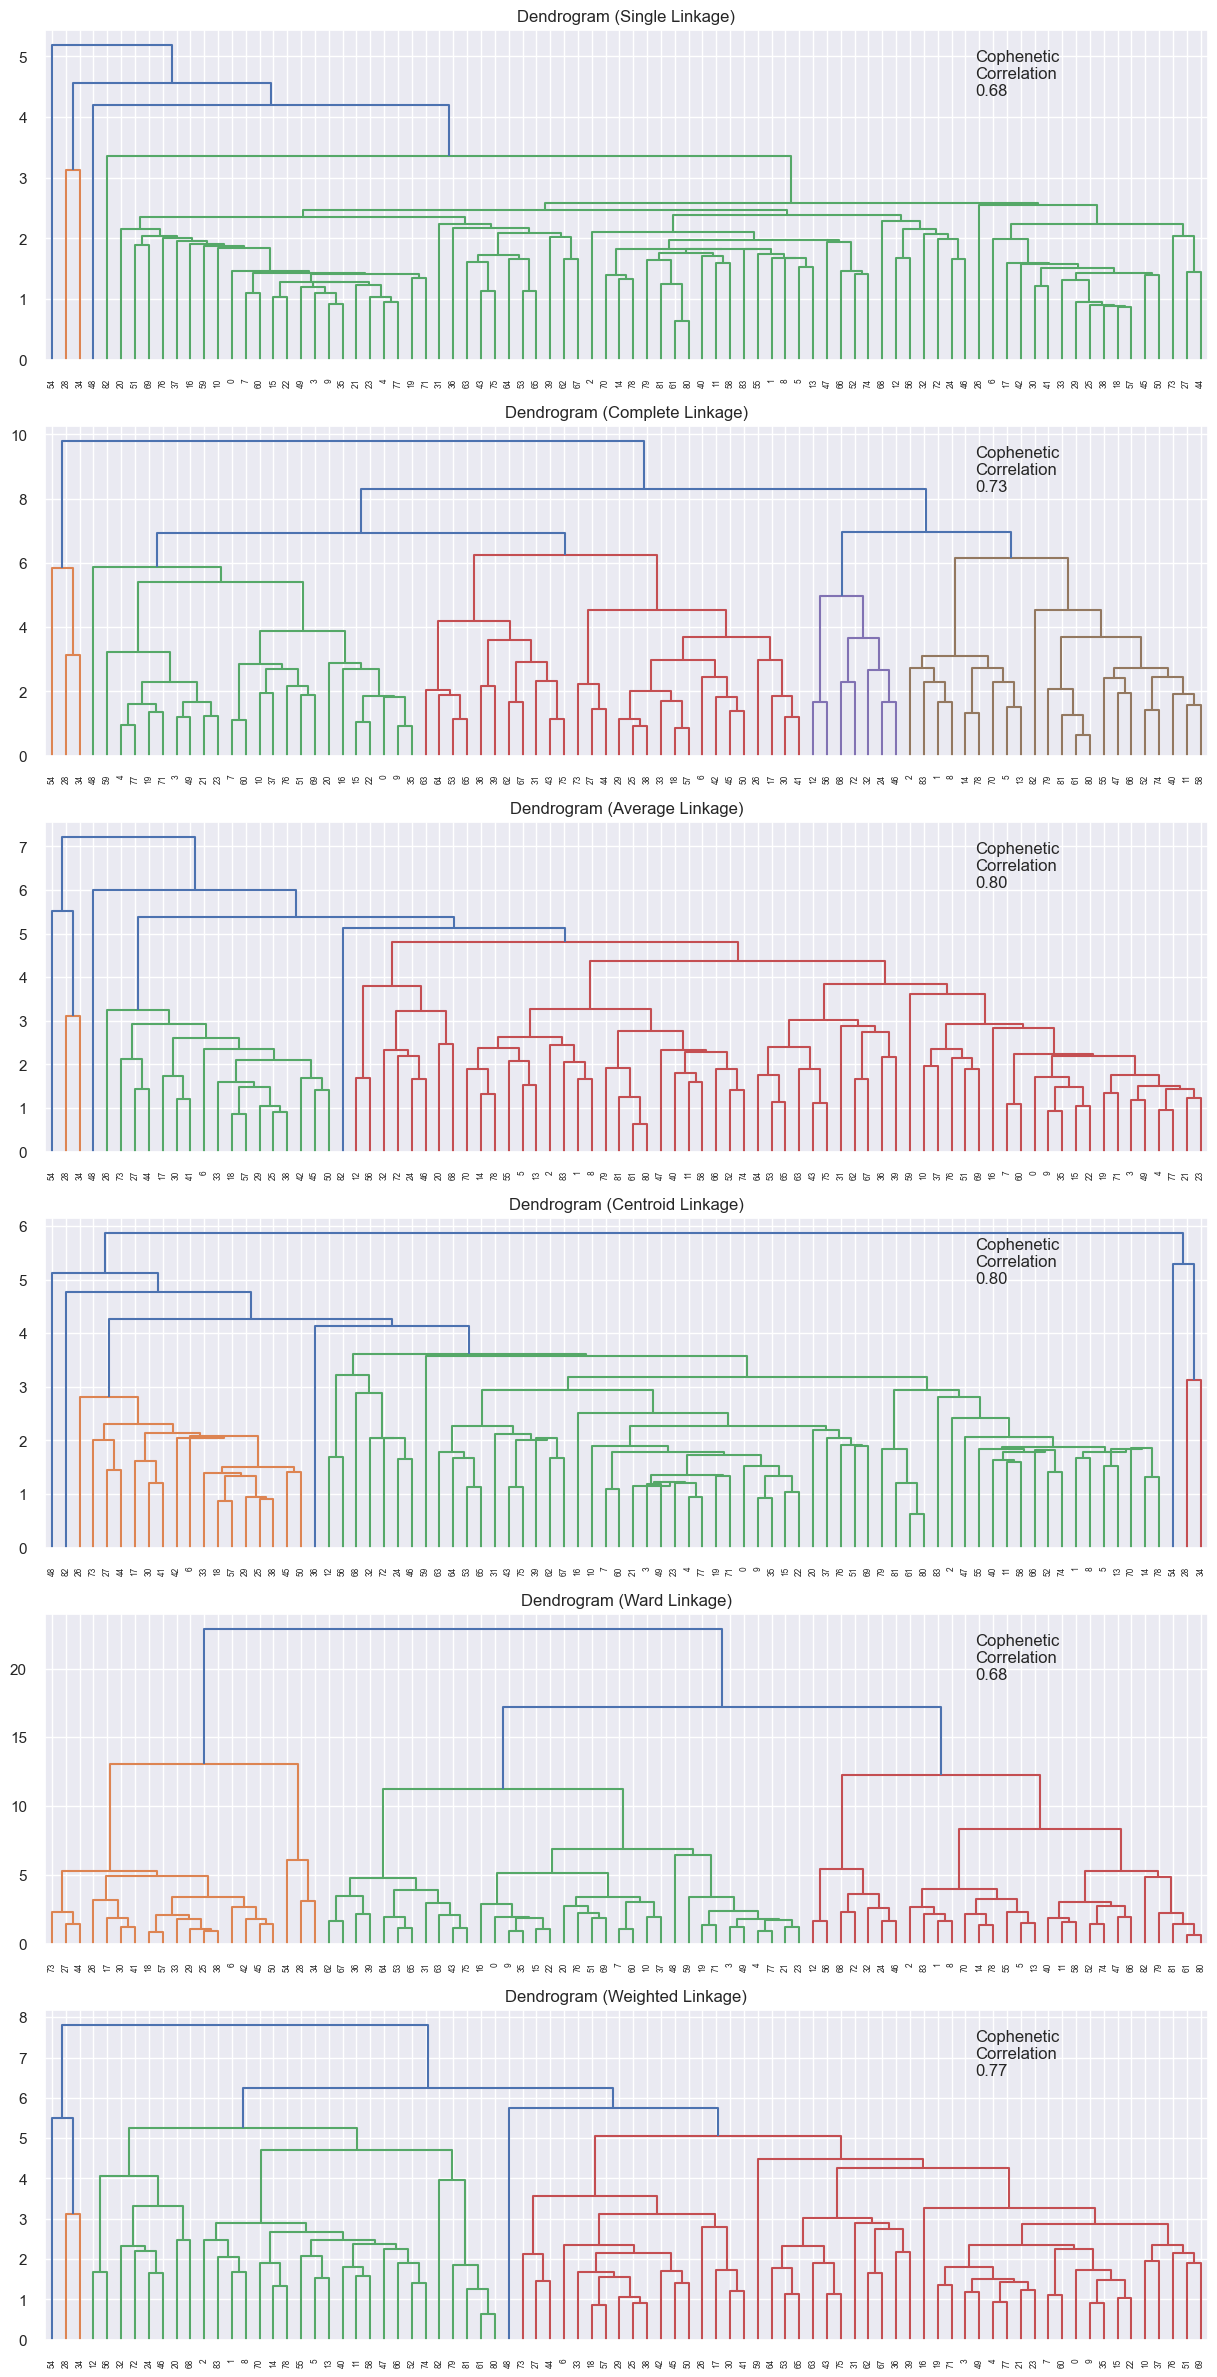

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [233]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [234]:
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.682843
0,single,0.684370
1,complete,0.731680
5,weighted,0.765254
3,centroid,0.795868
2,average,0.801614


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model using sklearn

In [235]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [236]:
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
subset_scaled_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Cluster Profiling

In [237]:
# Select only numeric columns for mean calculation
numeric_columns = df2.select_dtypes(include=[np.number])

# Calculate the mean for numeric columns
cluster_profile = numeric_columns.groupby(df2["HC_segments"]).mean()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [238]:
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_segments")["song"].count().values
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [239]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,acousticness,danceability,energy,instrumentalness,speechiness,tempo,valence,popularity,HC_segments,count_in_each_segments
HC_segments,,,,,,,,,,
0,0.302778,0.645425,0.604900,0.001185,0.263063,107.686150,0.391739,64.225000,0.000000,80
1,0.812000,0.411000,0.233500,0.073200,0.054700,112.746000,0.064150,64.000000,1.000000,2
2,0.651000,0.646000,0.608000,0.000000,0.751000,161.246000,0.966000,47.000000,2.000000,1
3,0.019300,0.766000,0.740000,0.078400,0.080700,118.008000,0.183000,81.000000,3.000000,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [240]:
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["song"].unique())
    print()

In cluster 0, the following companies are present:
['9 5  s o u t h' 'a m a r i' 'm y  l i f e'
 'a p p l y i n g  p r e s s u r e' 'p u n c h i n   t h e  c l o c k'
 '1 0 0  m i l' 'p r i d e  i s  t h e  d e v i l'
 'l e t  g o  m y  h a n d' 'i n t e r l u d e'
 't h e  c l i m b  b a c k' 'c l o s e'
 'h u n g e r  o n  h i l l s i d e' 'intro' 'kod' 'photograph'
 'the cut off' 'atm' 'motiv8' 'kevins heart' 'brackets'
 'once an addict  interlude' 'friends' 'window pain  outro'
 '1985  intro to the fall off' 'for whom the bell tolls' 'immortal'
 'deja vu' 'ville mentality' 'change' 'neighbors' 'foldin clothes'
 'shes mine pt 2' '4 your eyez only' 'january 28th' 'wet dreamz'
 '03 adolescence' 'a tale of 2 citiez' 'fire squad' 'st tropez' 'gomd'
 'no role modelz' 'hello' 'apparently' 'love yourz' 'note to self'
 'villuminati' 'land of the snakes' 'power trip' 'mo money  interlude'
 'trouble' 'runaway' 'rich niggaz' 'wheres jermaine  skit'
 'forbidden fruit' 'chaining day' 'aint that 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Final Model

In [241]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [242]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Cluster Profile

In [243]:
# let's see the names of the countries in each cluster
for cl in df2["HC_Clusters"].unique():
    print(
        "The",
        df2[df2["HC_Clusters"] == cl]["song"].nunique(),
        "Songs in cluster",
        cl,
        "are:",
    )
    print(df2[df2["HC_Clusters"] == cl]["song"].unique())
    print("-" * 100, "\n")

The 35 Songs in cluster 0 are:
['9 5  s o u t h' 'a p p l y i n g  p r e s s u r e'
 'p u n c h i n   t h e  c l o c k' 'l e t  g o  m y  h a n d'
 't h e  c l i m b  b a c k' 'c l o s e' 'the cut off' 'atm' 'brackets'
 'once an addict  interlude' 'friends' 'window pain  outro'
 '1985  intro to the fall off' 'foldin clothes' 'january 28th'
 'wet dreamz' '03 adolescence' 'fire squad' 'hello' 'kerney sermon  skit'
 'land of the snakes' 'mo money  interlude' 'runaway'
 'aint that some shit  interlude' 'crooked smile' 'born sinner'
 'miss america' 'new york times' 'is she gon pop' 'sparks will fly'
 'dollar and a dream iii' 'lights please' 'cole world' 'in the morning'
 'lost ones']
---------------------------------------------------------------------------------------------------- 

The 22 Songs in cluster 2 are:
['a m a r i' 'm y  l i f e' '1 0 0  m i l' 'i n t e r l u d e'
 'h u n g e r  o n  h i l l s i d e' 'kod' 'photograph' 'st tropez'
 'villuminati' 'trouble' 'rich niggaz' 'chainin

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [244]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,acousticness,danceability,energy,instrumentalness,speechiness,tempo,valence,popularity,HC_segments,count_in_each_segments
HC_segments,,,,,,,,,,
0,0.302778,0.645425,0.604900,0.001185,0.263063,107.686150,0.391739,64.225000,0.000000,80
1,0.812000,0.411000,0.233500,0.073200,0.054700,112.746000,0.064150,64.000000,1.000000,2
2,0.651000,0.646000,0.608000,0.000000,0.751000,161.246000,0.966000,47.000000,2.000000,1
3,0.019300,0.766000,0.740000,0.078400,0.080700,118.008000,0.183000,81.000000,3.000000,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

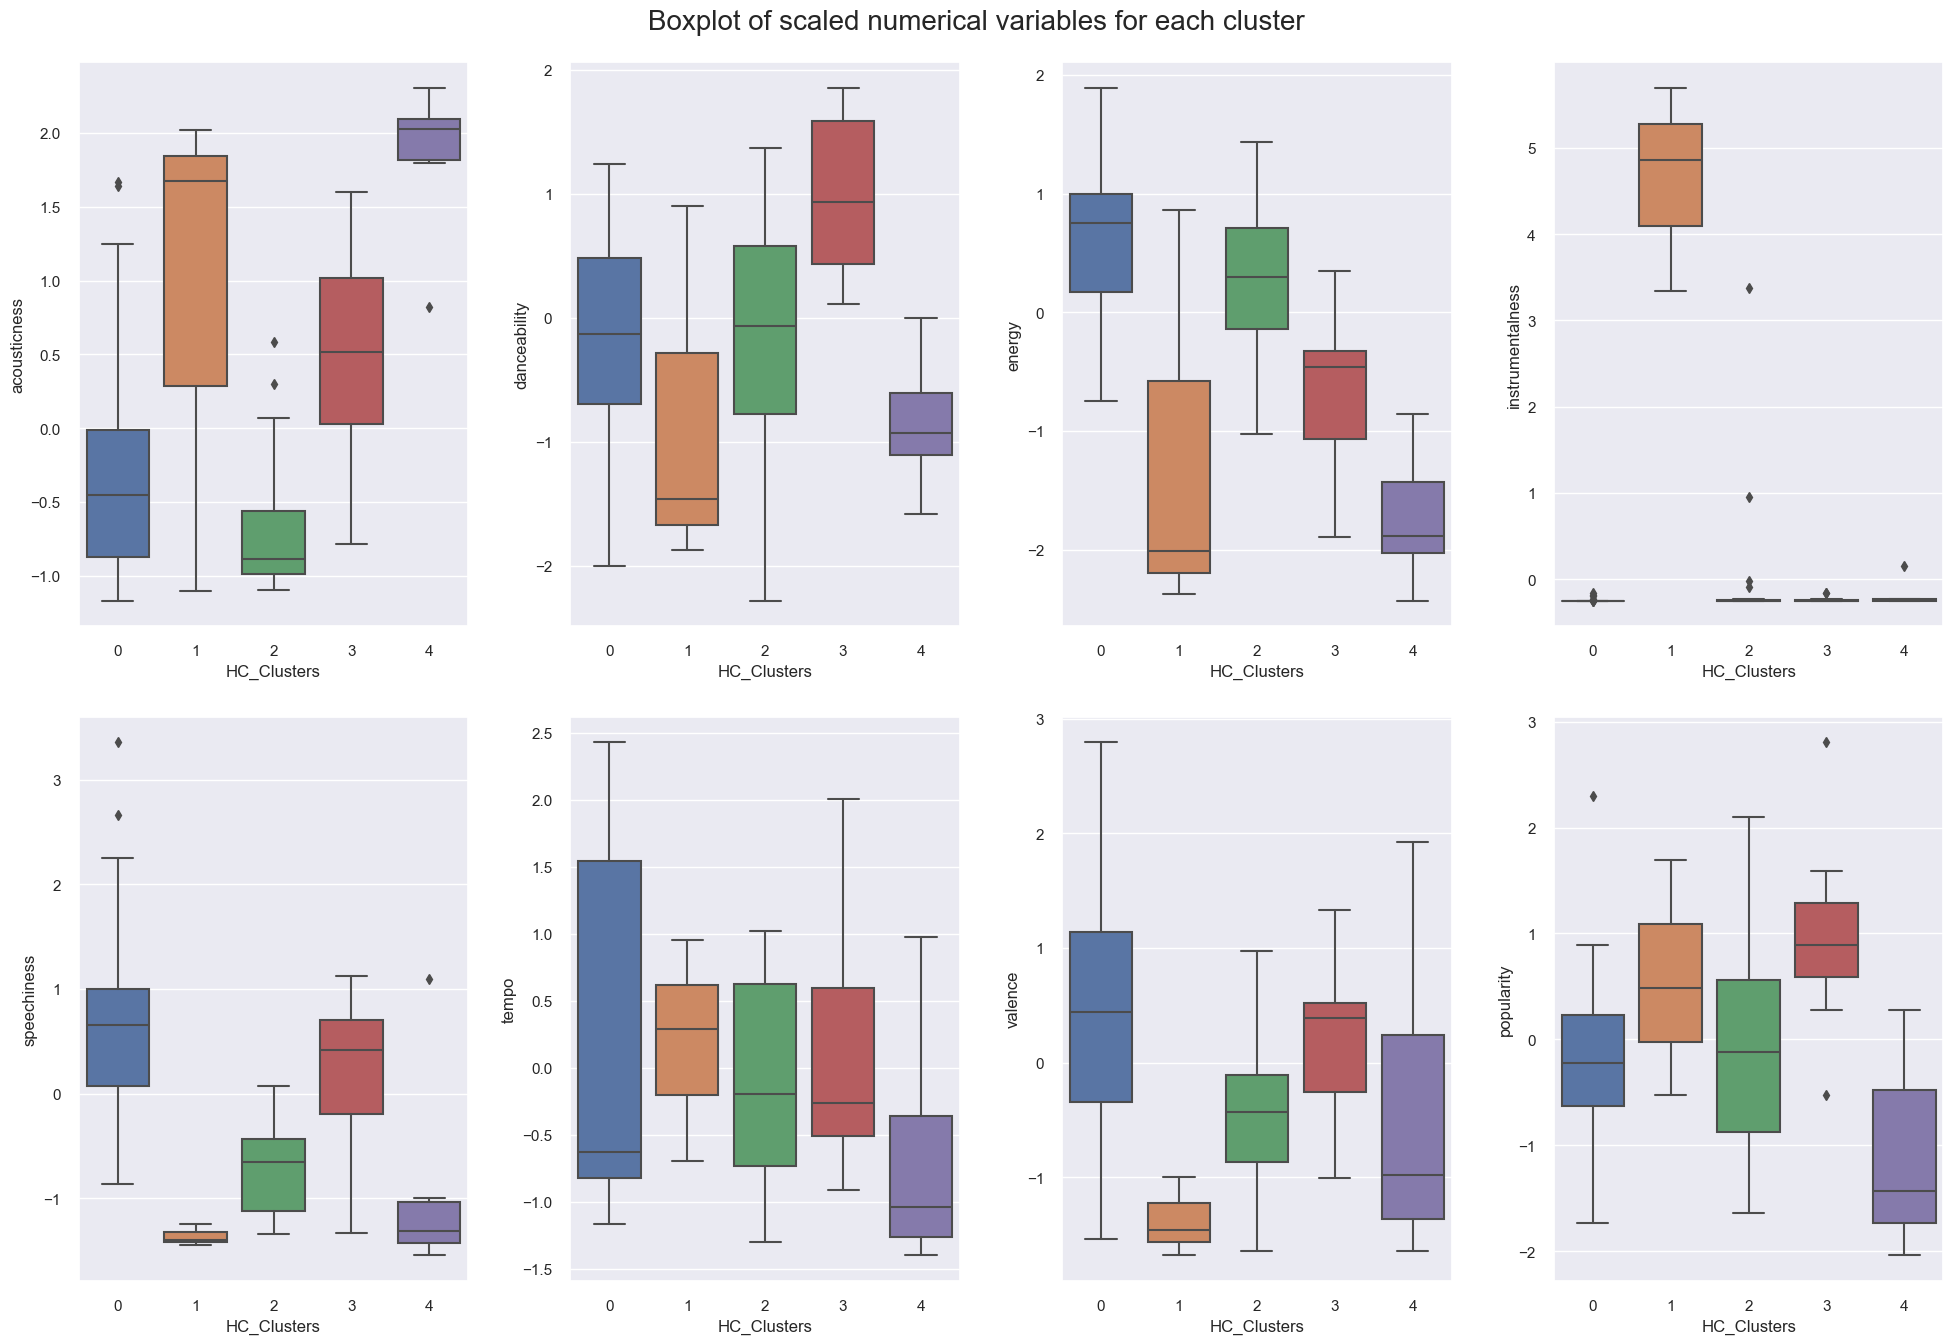

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [245]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
# selecting numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=subset_scaled_df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

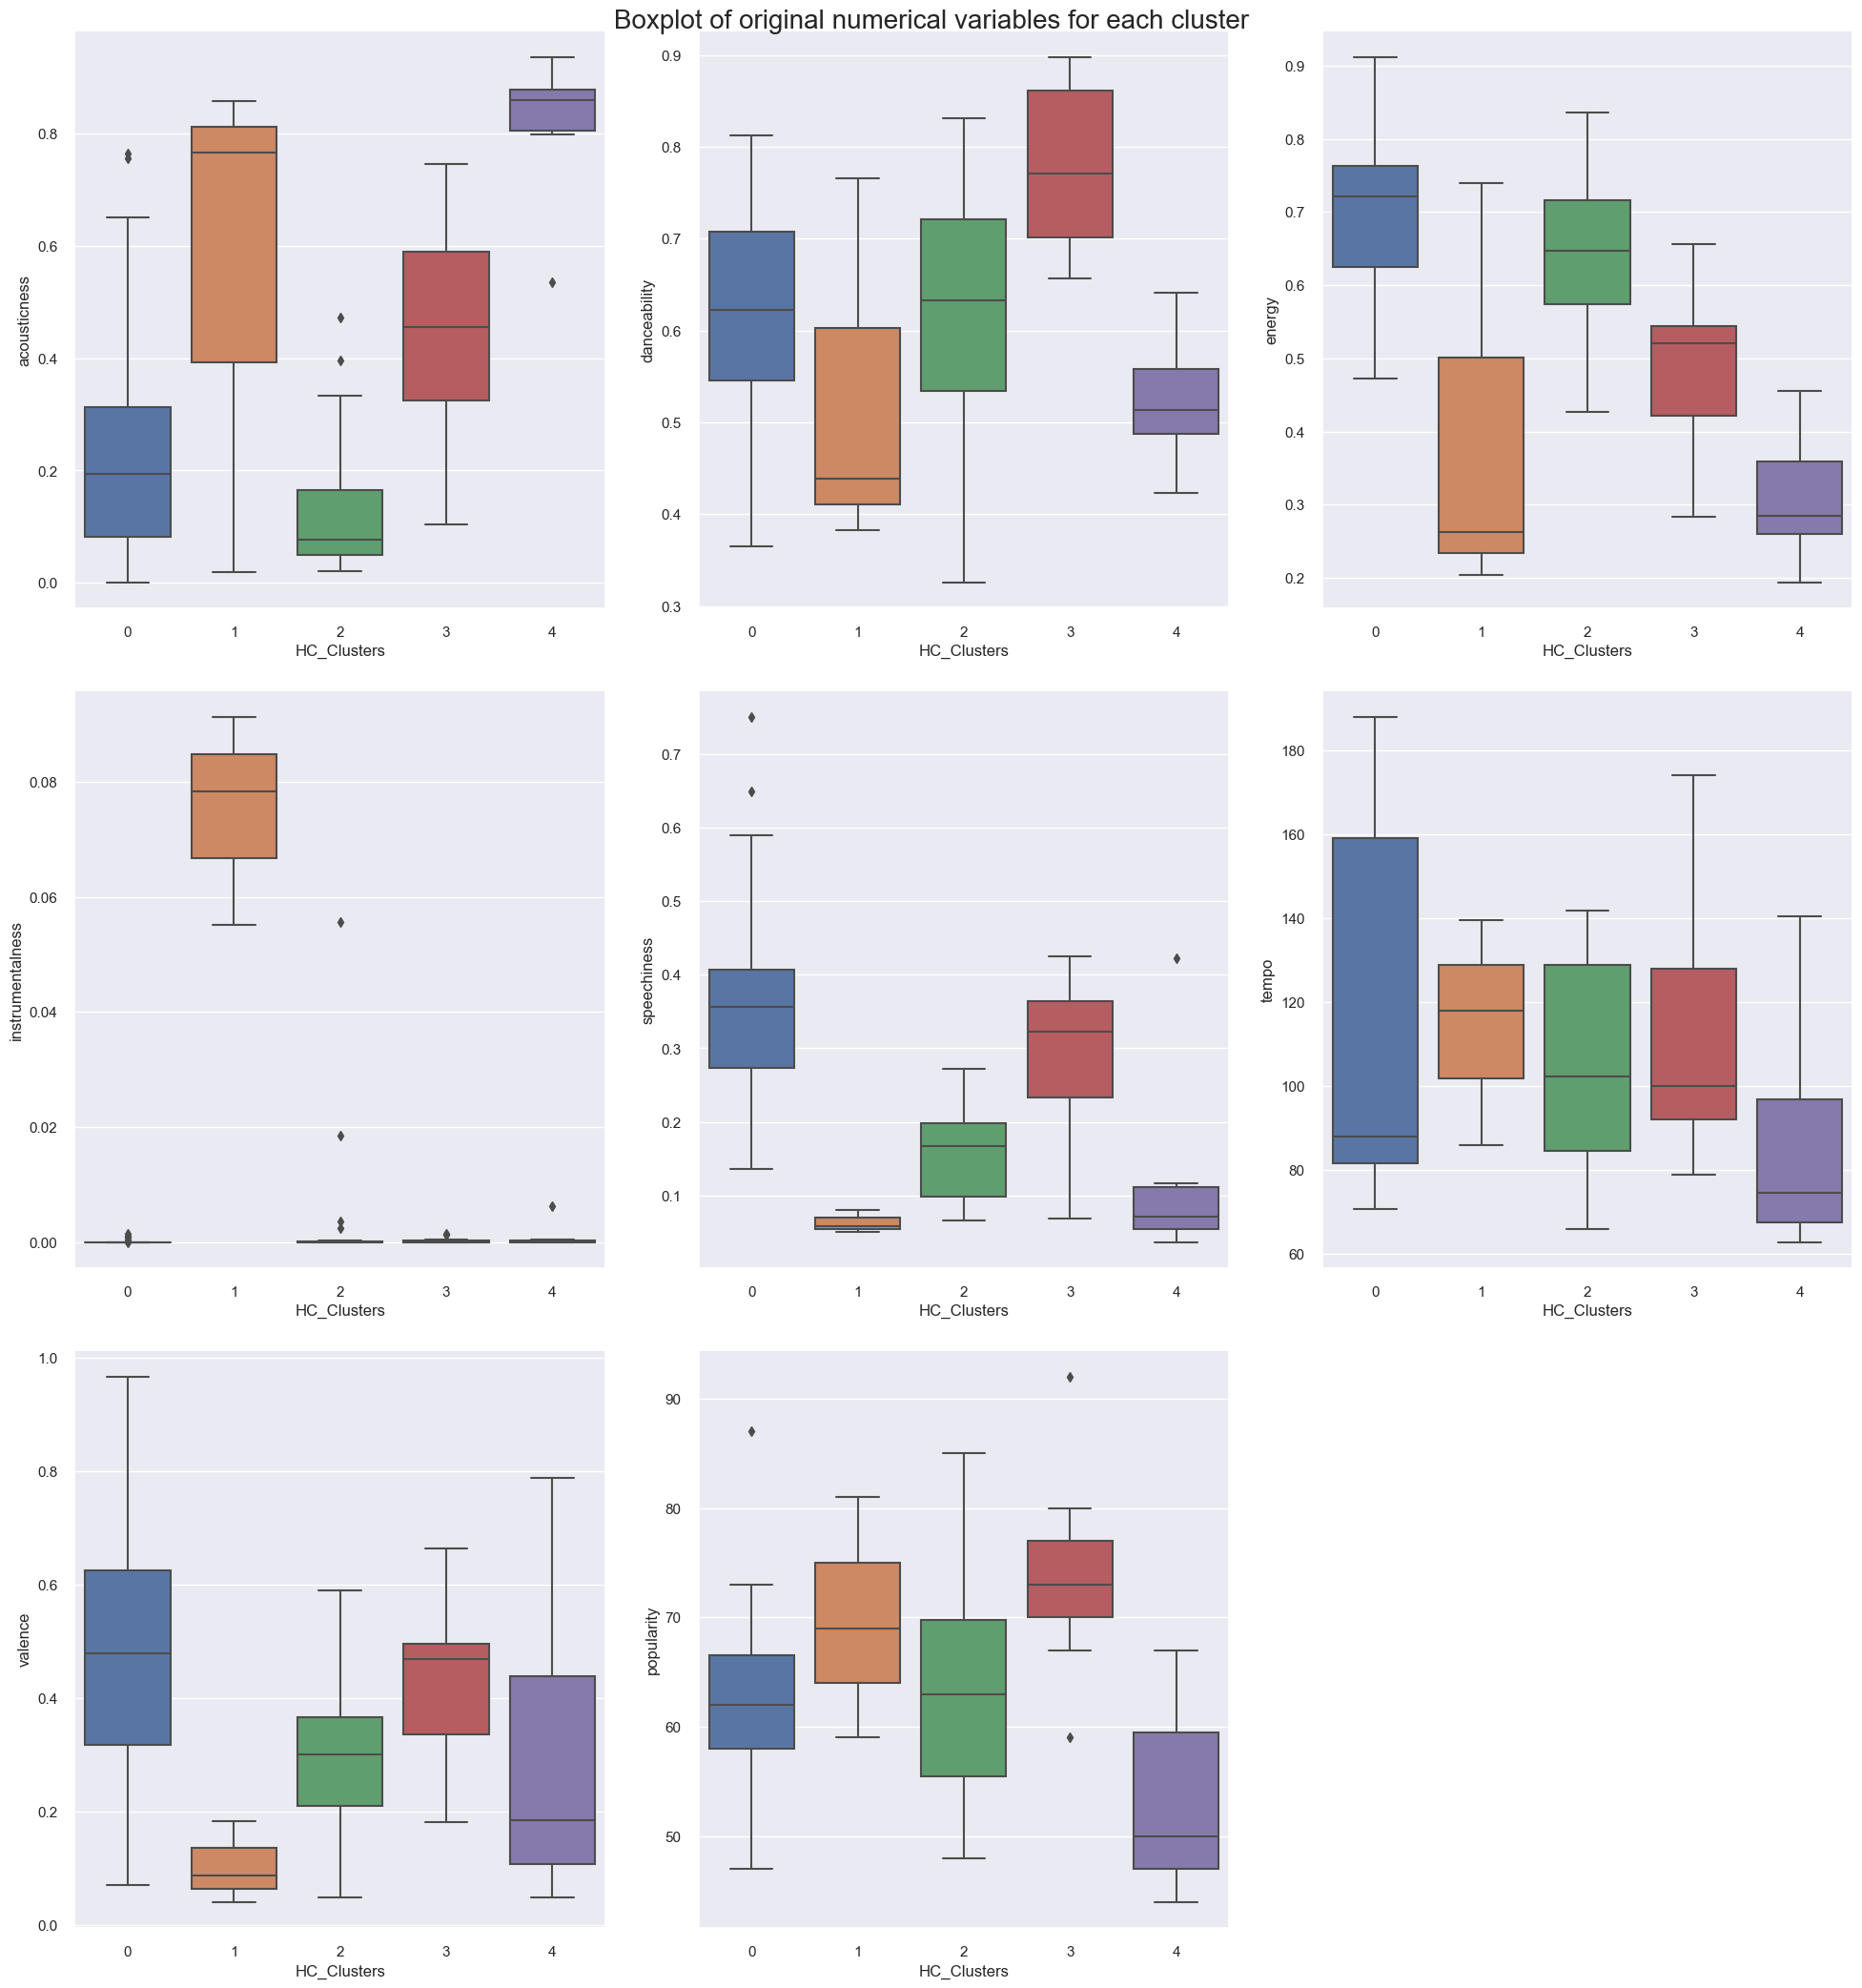

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [246]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df2, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

In [247]:
# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [248]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.5368564151927482

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Component 1', ylabel='Component 2'>

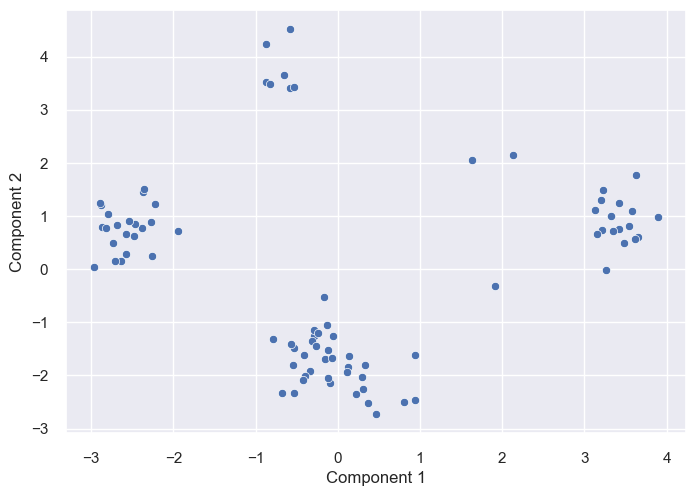

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [249]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

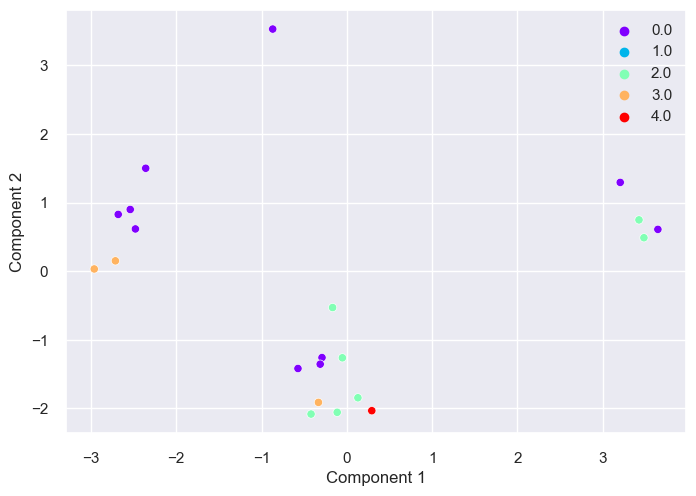

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [250]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df2["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))